# Text Analytics - Amazon Review Analysis

### Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# !pip install vaderSentiment
# !pip install nltk
# !pip install --upgrade scikit-learn
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2|
# !pip install imblearn
# !pip install transformers
# !pip install contractions
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob
import logging
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import time
# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns
from tqdm.notebook import tqdm
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import string
from sklearn.base import TransformerMixin
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from collections import Counter
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import urllib.request
import zipfile
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
print("Libraries imported successfully!")

c:\Users\onetw\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\onetw\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\onetw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\onetw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\onetw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Libraries imported successfully!


In [3]:
# PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

# Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import LatentDirichletAllocation

import time

# Set seed for reproducibility
import random
from spacy.util import compounding
from spacy.util import minibatch
from collections import defaultdict
from collections import Counter
import tensorflow as tf
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)
print("Deep Learning Libraries Imported!")

Deep Learning Libraries Imported!


In [ ]:
# Reading the train data
train_df = pd.read_csv('train.csv')
train_df.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

### EDA Process - Before Pre-Processing

In [ ]:
#Understanding the size of the dataset
train_df.shape

(370863, 2)

In [ ]:
#Checking if there are any null/empty values in the dataset
train_df.isnull().sum()

overall    0
Review     0
dtype: int64

##### There are 0 null values present in the dataset

In [ ]:
train_df.describe()

overall
count  370863.000000
mean        4.566600
std         0.930377
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000

#### Understanding the distribution of the text length

In [ ]:
train_df['length'] = train_df['Review'].apply(len)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370863 entries, 0 to 370862
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  370863 non-null  int64 
 1   Review   370863 non-null  object
 2   length   370863 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.5+ MB


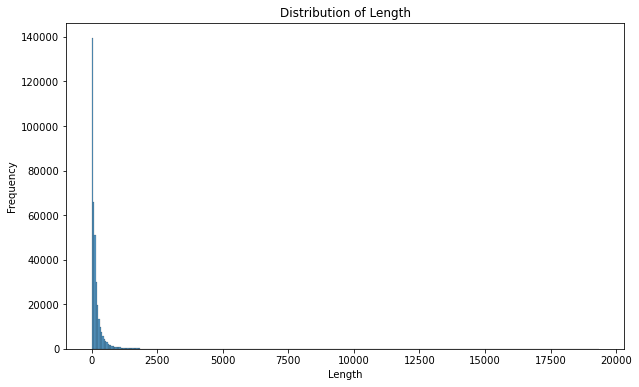

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df["length"], binwidth=50)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Length')
plt.show()

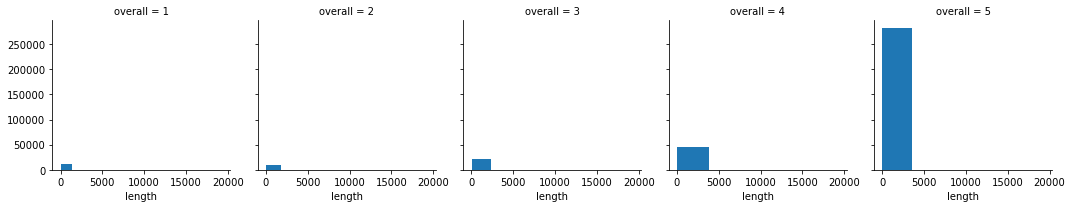

In [ ]:
g = sns.FacetGrid(train_df, col = 'overall')

g.map(plt.hist, 'length', bins = 5)

<AxesSubplot:xlabel='overall', ylabel='length'>

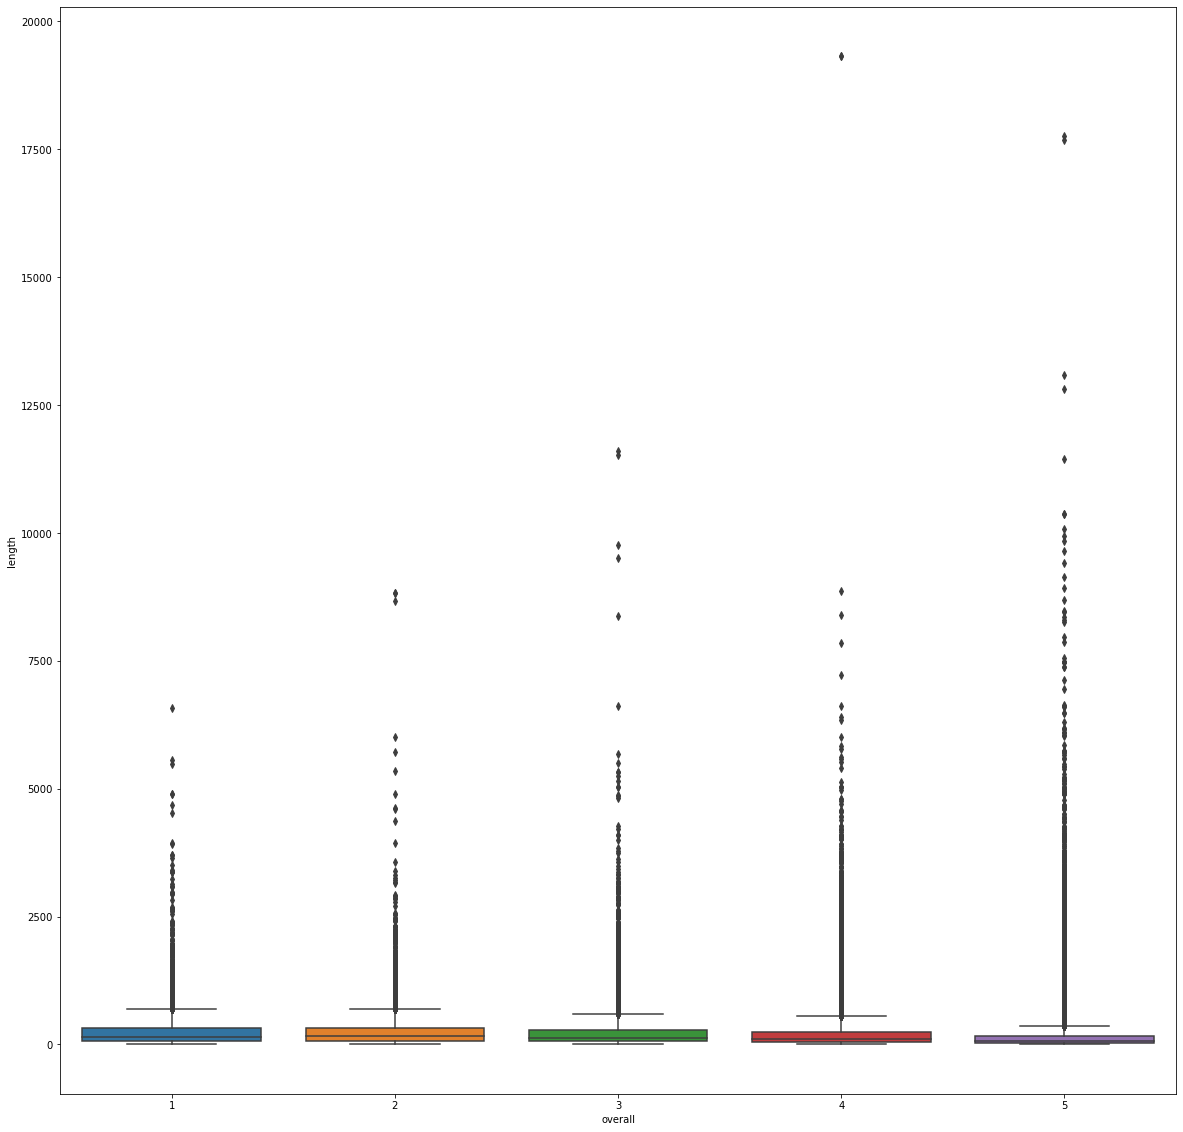

In [ ]:
plt.figure(figsize=(20, 20))
sns.boxplot(x = 'overall' , y = 'length', data = train_df)

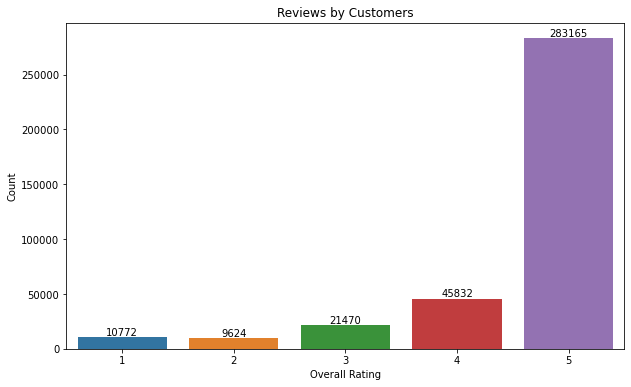

In [ ]:
# Count the occurrences of each rating
rating_counts = train_df['overall'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=rating_counts, x='Rating', y='Count')

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.title('Reviews by Customers')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
df = train_df['overall'].value_counts().reset_index()
df.columns = ['Rating', 'Count']

fig = px.pie(df, values='Count', names='Rating',
             title='Rating Distribution',
             labels={'Rating': 'Overall Rating', 'Count': 'Count'},
             width=800, height=400)
fig.show()

In [ ]:
# Checking if the above count is right in the graph
train_df['overall'].value_counts()

5    283165
4     45832
3     21470
1     10772
2      9624
Name: overall, dtype: int64

##### It can be noted that the dataset is highest skewed with majority of the entries being from Class 5.

In [ ]:
rating = train_df.groupby('overall').mean()
rating

length
overall            
1        255.339120
2        263.364609
3        239.216581
4        218.573355
5        145.120364

#### It can be seen that the length of reviews with rating 5 has lesser lenght for sentence compared to others

In [ ]:
train_df.length.describe()

count    370863.000000
mean        165.915112
std         302.338133
min           1.000000
25%          30.000000
50%          82.000000
75%         185.000000
max       19323.000000
Name: length, dtype: float64

In [ ]:
train_df[train_df['length'] == 19323]['Review'].iloc[0]

'Expression vs. Slice\nThere is no comparison - if you can only get 1 machine get the expression - it\'s worth the extra money...why?\nI have the Slice - that was my first machine (I got it 2 weeks ago) only because it had the designs I wanted (tags) and also had some cool accessories and it\'s my first die cut machine. You have to hold it down to use it, there aren\'t that many cartridges and if you wait for sales - they are both about the same $. If you need a machine to cut a couple of things here and there and go for the slice. (Read my Slice review for more details).\n\nExpression vs. Personal\nThe personal cricut only cuts to 5.5" - and it\'s pretty much like the Slice - around the same price point as well. It does NOT compare with the capabilities of the Expression. Expression cuts in larger sizes, more feature - the LCD screen is more detailed, it\'s a far more sophisticated machine (think of composition notebook vs. laptop) - also spoke with a cricut user at a store - she said

#### The reviews need further cleaning

###   Choosing a random comment from the dataframe and showing the word cloud

(-0.5, 399.5, 199.5, -0.5)

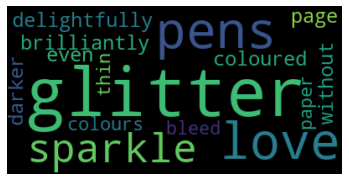

In [ ]:
text = train_df.Review[0]

# World Cloud:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

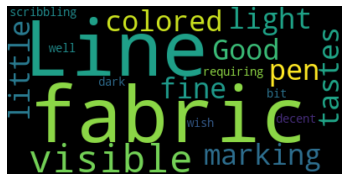

In [ ]:
text = train_df.Review[12] # Choosing a random comment from the dataframe

# World Cloud:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
train_df['Id'] = range(1, len(train_df) + 1)

In [ ]:
train_df.tail()

overall                                             Review  length  \
370858        5  I love these dies they make great backgrounds ...      59   
370859        5  I love Darice embossing folders.  Darcie's fol...     138   
370860        5  I ordered these to add to my Earthy Markers th...     243   
370861        4  Made perfect off white color by blending a tin...     143   
370862        5  I used this to make photo canvases for Christm...     324   

            Id  
370858  370859  
370859  370860  
370860  370861  
370861  370862  
370862  370863

### Creating sentiment score for all the comments

In [ ]:
SIA=SentimentIntensityAnalyzer()
results={}
for i,row in tqdm(train_df.iterrows(),total=len(df)):
    text=row['Review']
    myid=row['Id']
    results[myid]=SIA.polarity_scores(text)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
Vaders=pd.DataFrame(results).T
Vaders= Vaders.reset_index().rename(columns={'index': 'Id'})
Vaders=Vaders.merge(train_df,how='left')

In [ ]:
Vaders.head()

Id    neg    neu    pos  compound  overall  \
0   1  0.000  0.616  0.384    0.9432        5   
1   2  0.000  0.840  0.160    0.2732        5   
2   3  0.042  0.895  0.063    0.3400        5   
3   4  0.000  1.000  0.000    0.0000        5   
4   5  0.000  1.000  0.000    0.0000        5   

                                              Review  length  
0  I love these glitter pens. They sparkle deligh...     181  
1  It works well with my machine.  I use mostly c...      57  
2  This is a great assortment of colors, though t...     318  
3                       Just what I was looking for.      28  
4      I make 400 birds for the hospital each month.      45

## Checking the polarity with RoBERTa

##### RoBERTa is a transformers model that was self-supervised and pre-trained on a huge corpus of English data. This indicates that it was just pre-trained on the raw texts, without any human labeling, with an automatic procedure that uses the texts to produce inputs and labels. RoBERTa and BERT differ significantly from each other in that RoBERTa was learned using a larger dataset and a more efficient training method. RoBERTa was specifically trained on a dataset of 160GB of text, which is more than 10 times bigger than the dataset used to train BERT.

In [ ]:
#Load the pre-trained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def roberta_polarity_scores(sentence, max_length=512):
    encoded_text = tokenizer(sentence[:max_length], return_tensors='pt', max_length=max_length, truncation=True)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

res = {}
for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    try:
        text = row['Review']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_polarity_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke at id {myid}')

  0%|          | 0/370863 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(train_df, how='left')

In [ ]:
results_df.head()

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0   1      0.000      0.616      0.384          0.9432     0.002276   
1   2      0.000      0.840      0.160          0.2732     0.005162   
2   3      0.042      0.895      0.063          0.3400     0.002836   
3   4      0.000      1.000      0.000          0.0000     0.026309   
4   5      0.000      1.000      0.000          0.0000     0.109451   

   roberta_neu  roberta_pos  overall  \
0     0.011605     0.986119        5   
1     0.089017     0.905822        5   
2     0.030591     0.966573        5   
3     0.375422     0.598269        5   
4     0.802479     0.088070        5   

                                              Review  length  
0  I love these glitter pens. They sparkle deligh...     181  
1  It works well with my machine.  I use mostly c...      57  
2  This is a great assortment of colors, though t...     318  
3                       Just what I was looking for.      28  
4      I make 400 birds for the hospital each month.      45

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'overall', 'Review',
       'length'],
      dtype='object')

### Identifying wrongly classified texts and printing them

In [ ]:
results_df.query('overall == 1').sort_values('roberta_pos',ascending = False)['Review'].values[2]

'I really love these needles!!!!  They are my new favorite needles.'

In [ ]:
results_df.query('overall == 1').sort_values('roberta_pos',ascending = False)['Review'].values[0]

'I love this spray for holding quilt layers together and this is the best price that I have found. Love it.'

In [ ]:
results_df.query('overall == 1').sort_values('vader_pos',ascending = False)['Review'].values[1]

'GREAT'

### As seen above, we took a text that was classified as positive by Vader and RoBERTa positive but the customer rating is 1.
- It can be seen that even though the customer rating is 1 the review given is positive and RoBERTa has classified it rightly as positive
- Second point to note would be that there are alot of comments which has a single word in it, which means the dataframe requires further preprocessing

In [ ]:
results_df.query('overall == 5').sort_values('roberta_neg',ascending = False)['Review'].values[0]

'this stuff sucks balls!  it ripped up my paper and ruined my master piece of crap!'

In [ ]:
results_df.query('overall == 5').sort_values('vader_neg',ascending = False)['Review'].values[6]

'No tarnish awesome!'

### As seen above, we took a text that was classified as Negative by Vader and RoBERTa positive but the customer rating is 1.
- It can be seen that even though the customer rating is 5 the review given is classified as negative by RoBERTa & Vader which could be possibly due to words like "Cant", "No Tarnish" etc.

### Ploting the graph based on the length of the reviews based on rating as we saw so many comments were with one word texts which possibily effect model on the later stages

#### Length Analysis

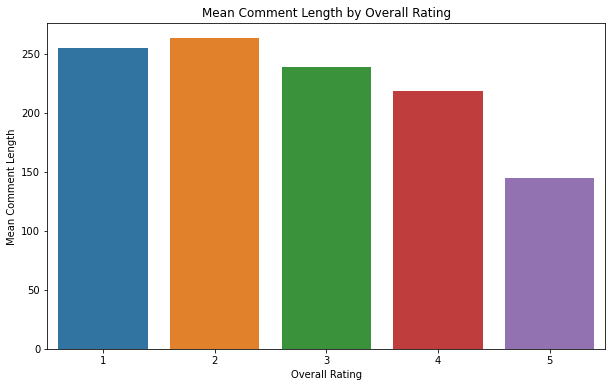

In [ ]:
# Calculate the mean or median length for each class
mean_lengths = train_df.groupby('overall')['length'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_lengths.index, y=mean_lengths.values)
plt.title('Mean Comment Length by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Comment Length')
plt.show()

#### Length distribution for class 1

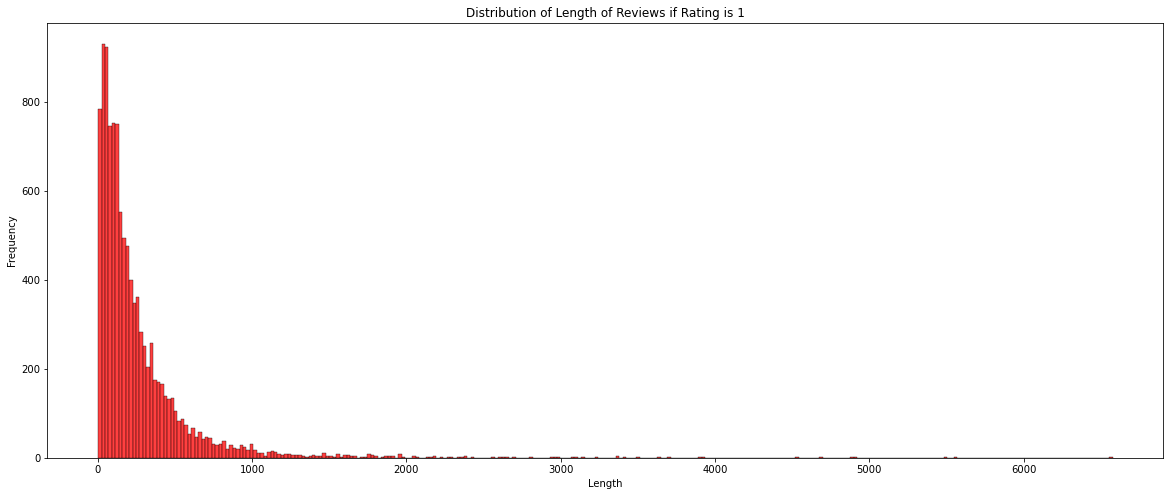

In [ ]:
plt.figure(figsize=(20, 8))
sns.histplot(train_df[train_df["overall"] == 1]['length'], color='red')
plt.title("Distribution of Length of Reviews if Rating is 1")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#### Length distribution for class 2

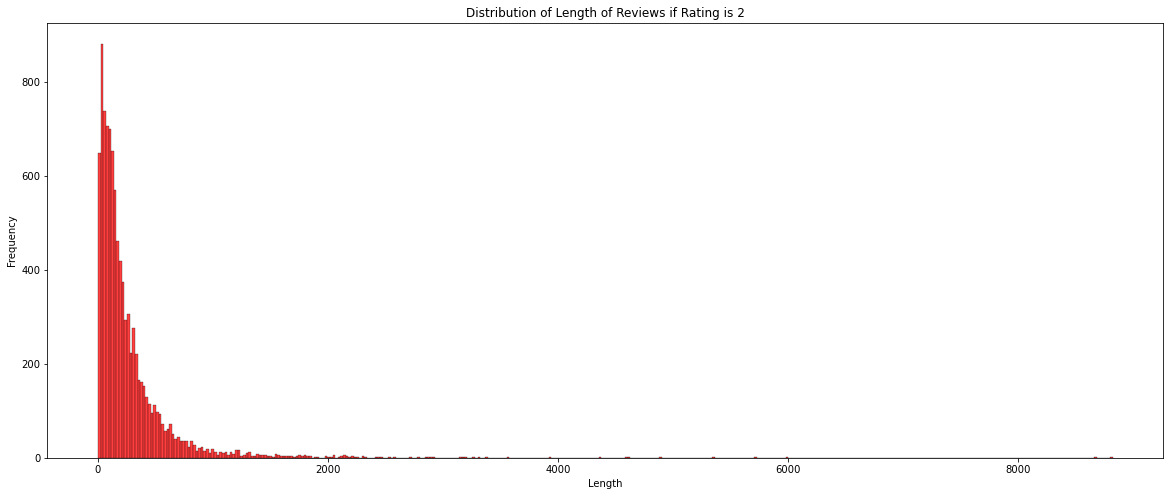

In [ ]:
plt.figure(figsize=(20, 8))
sns.histplot(train_df[train_df["overall"] == 2]['length'], color='red')
plt.title("Distribution of Length of Reviews if Rating is 2")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#### Length distribution for class 3

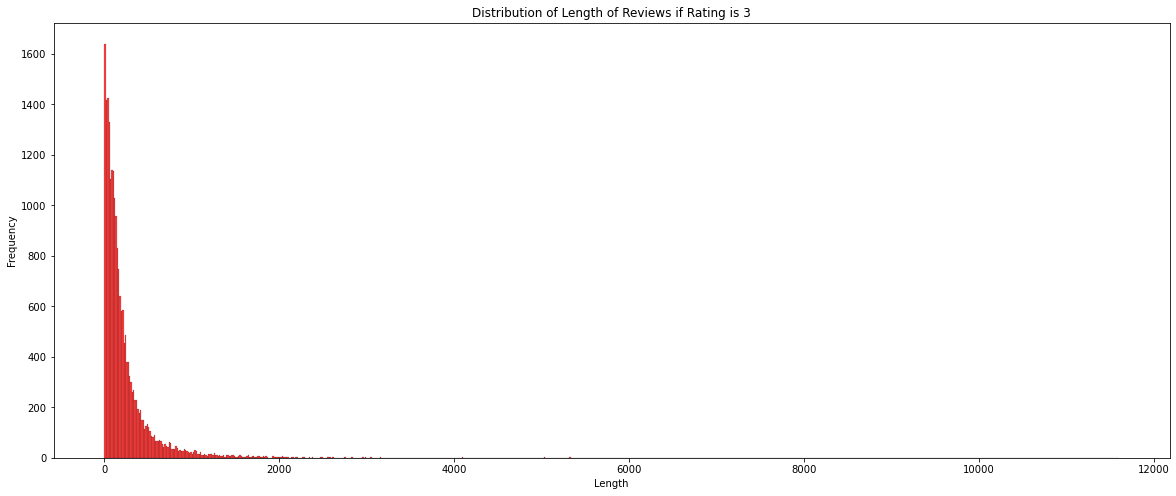

In [ ]:
plt.figure(figsize=(20, 8))
sns.histplot(train_df[train_df["overall"] == 3]['length'], color='red')
plt.title("Distribution of Length of Reviews if Rating is 3")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#### Length distribution for class 4

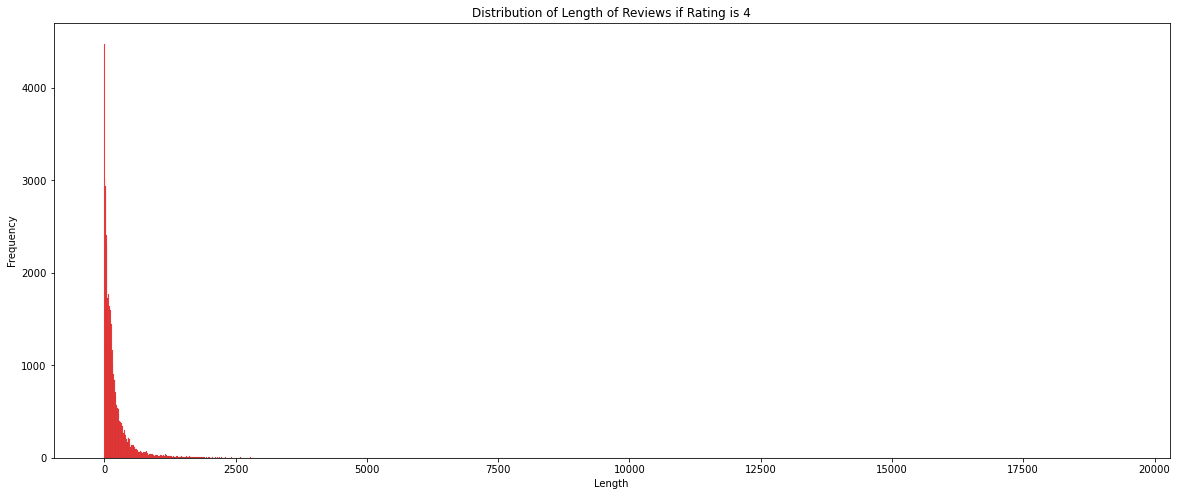

In [ ]:
plt.figure(figsize=(20, 8))
sns.histplot(train_df[train_df["overall"] == 4]['length'], color='red')
plt.title("Distribution of Length of Reviews if Rating is 4")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#### Length distribution for class 5

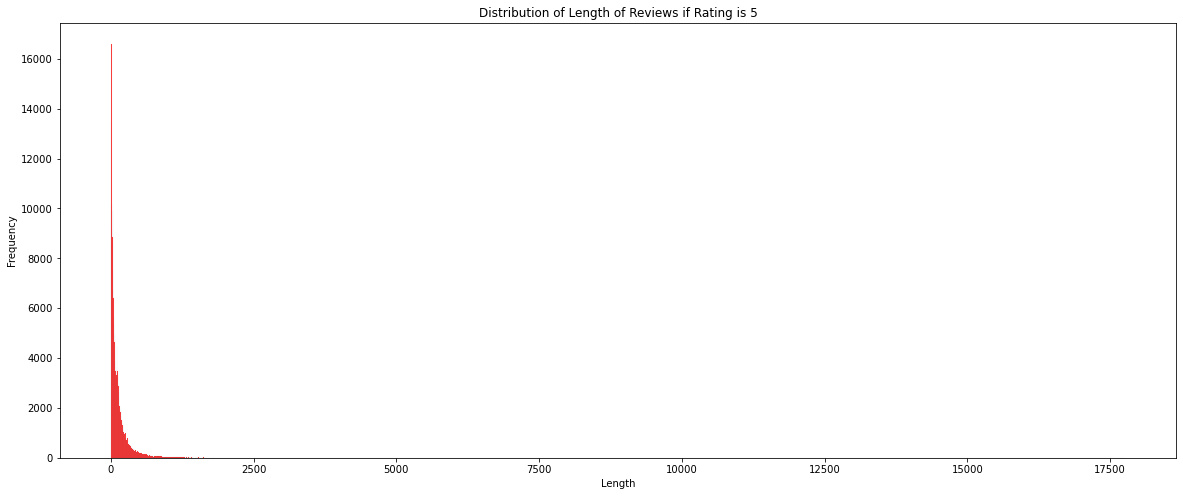

In [ ]:
plt.figure(figsize=(20, 8))
sns.histplot(train_df[train_df["overall"] == 5]['length'], color='red')
plt.title("Distribution of Length of Reviews if Rating is 5")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

### Vader model breakdown by rating

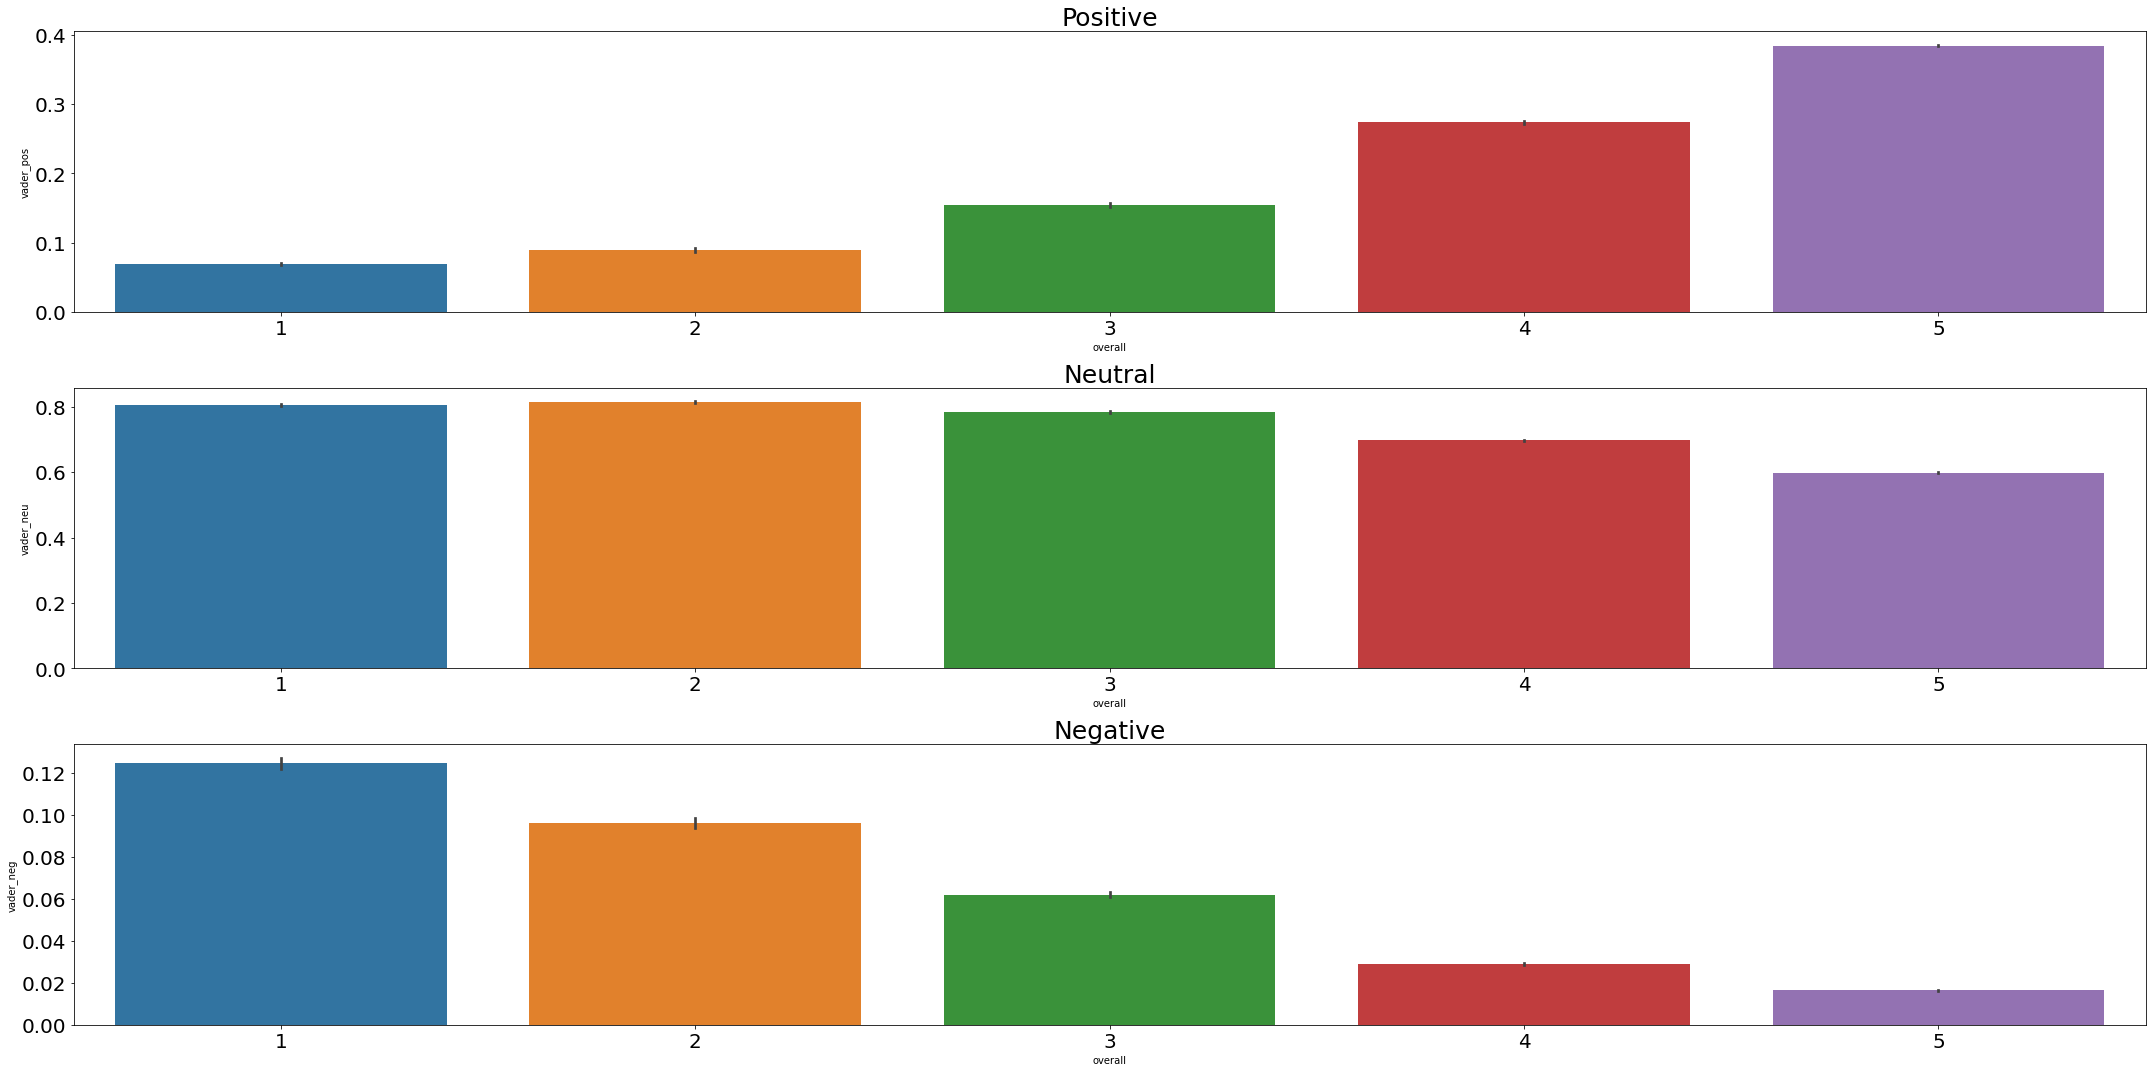

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(30, 15))
sns.barplot(data=results_df, x='overall', y='vader_pos', ax=ax[0])
ax[0].set_title("Positive", fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=20)
sns.barplot(data=results_df, x='overall', y='vader_neu', ax=ax[1])
ax[1].set_title("Neutral", fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=20)
sns.barplot(data=results_df, x='overall', y='vader_neg', ax=ax[2])
ax[2].set_title("Negative", fontsize=25)
ax[2].tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

### RoBERTa model breakdown by polarity by rating

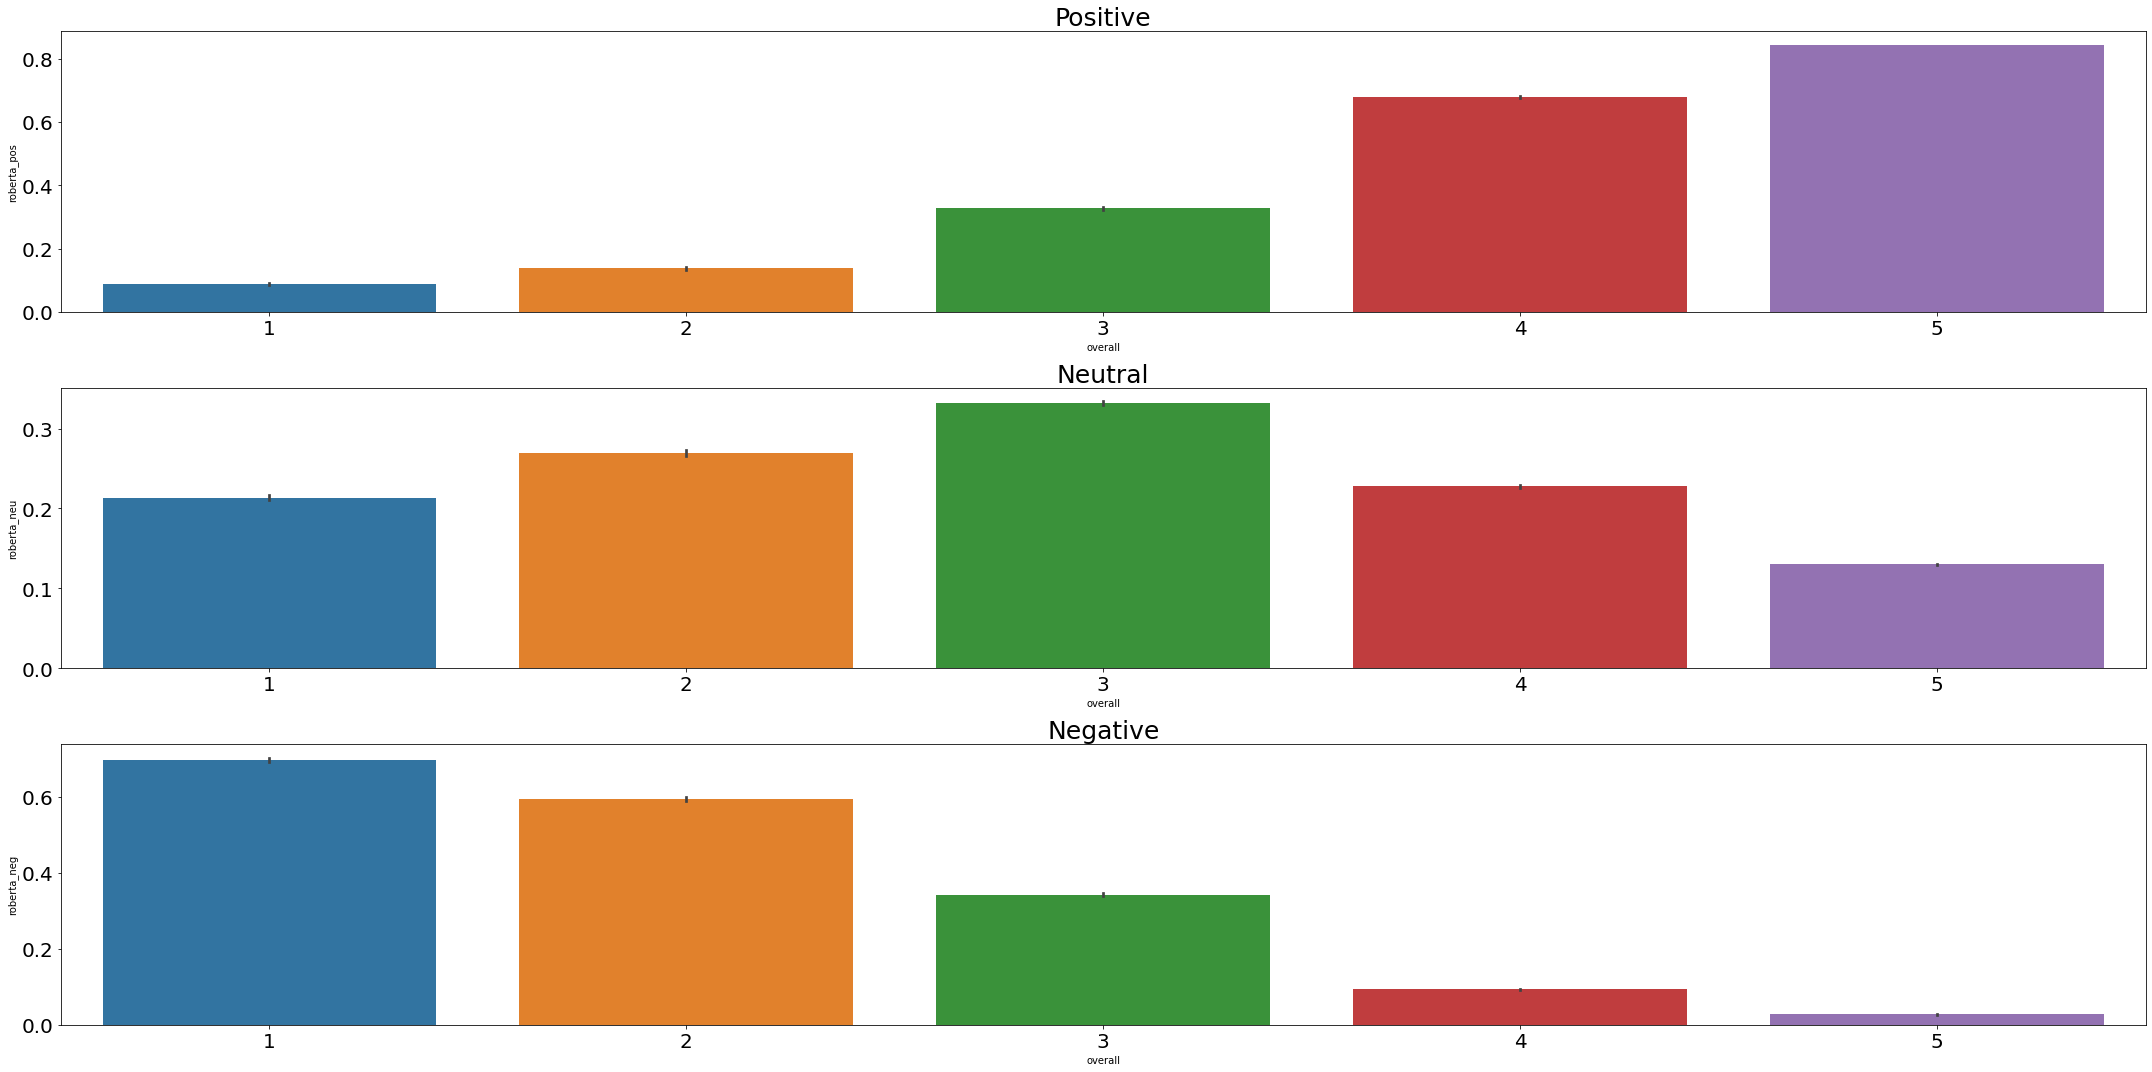

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(30, 15))
sns.barplot(data=results_df, x='overall', y='roberta_pos', ax=ax[0])
ax[0].set_title("Positive", fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=20)
sns.barplot(data=results_df, x='overall', y='roberta_neu', ax=ax[1])
ax[1].set_title("Neutral", fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=20)
sns.barplot(data=results_df, x='overall', y='roberta_neg', ax=ax[2])
ax[2].set_title("Negative", fontsize=25)
ax[2].tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

####
- From the above diagrams, it is clear to us that a lot of negative comments which has the rating of 1 and 2 has higher polarity score in Neutral than negative and positive.
- However on the other hand it can be seen that the positive reviews ( with ratings 4 & 5 ) has higher polarity score in Positive, and neutral reviews ( with ratings 2 & 3 ) has higher polarity score in Neutral and Negative reviews ( with ratings 1 ) has higher polarity score in Negative.

### Checking the frequency of words before stop words, Punctuation removal

In [ ]:
results_df['temp_list'] = results_df['Review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in results_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

#### Most repeated words in the reviews are stop words such as "the", "I", "and" etc.

In [ ]:
results_df.head()

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0   1      0.000      0.616      0.384          0.9432     0.002276   
1   2      0.000      0.840      0.160          0.2732     0.005162   
2   3      0.042      0.895      0.063          0.3400     0.002836   
3   4      0.000      1.000      0.000          0.0000     0.026309   
4   5      0.000      1.000      0.000          0.0000     0.109451   

   roberta_neu  roberta_pos  overall  \
0     0.011605     0.986119        5   
1     0.089017     0.905822        5   
2     0.030591     0.966573        5   
3     0.375422     0.598269        5   
4     0.802479     0.088070        5   

                                              Review  length  \
0  I love these glitter pens. They sparkle deligh...     181   
1  It works well with my machine.  I use mostly c...      57   
2  This is a great assortment of colors, though t...     318   
3                       Just what I was looking for.      28   
4      I make 400 birds for the hospital each month.      45   

                                           temp_list  
0  [I, love, these, glitter, pens., They, sparkle...  
1  [It, works, well, with, my, machine., I, use, ...  
2  [This, is, a, great, assortment, of, colors,, ...  
3                [Just, what, I, was, looking, for.]  
4  [I, make, 400, birds, for, the, hospital, each...

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(results_df.Review)

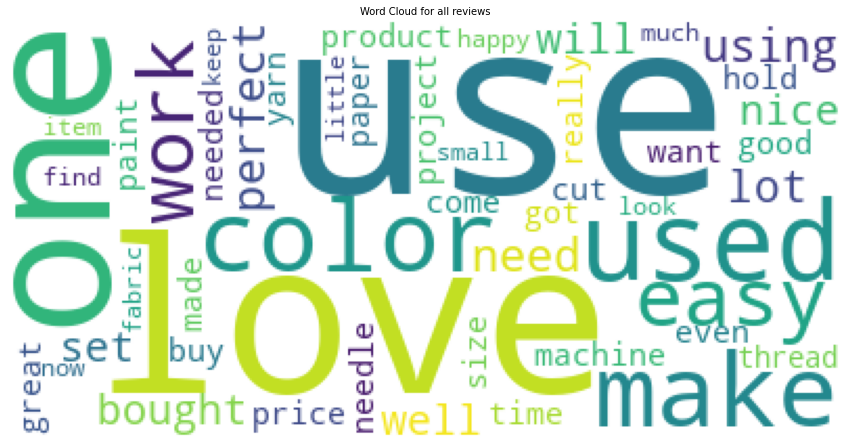

In [ ]:
reviews = " ".join([review for review in results_df["Review"]])

wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,15))
plt.imshow(wc.generate(reviews))
plt.title("Word Cloud for all reviews", fontsize = 10)
plt.axis('off')
plt.show()

#### As seen above, we can see that some of the mst reccuring wordsa are "Love" , "Use", "Work","Product" , etc.

## Splitting the dataset based on different ratings to show the word cloud for each and every class

In [ ]:
# Combining all reviews for each rating
class_one = " ".join(results_df[results_df["overall"] == 1]['Review'])
class_one = class_one.lower().split()

class_two = " ".join(results_df[results_df["overall"] == 2]['Review'])
class_two = class_two.lower().split()

class_three = " ".join(results_df[results_df["overall"] == 3]['Review'])
class_three = class_three.lower().split()

class_four = " ".join(results_df[results_df["overall"] == 4]['Review'])
class_four = class_four.lower().split()

class_five = " ".join(results_df[results_df["overall"] == 5]['Review'])
class_five = class_five.lower().split()

# Finding words from reviews which are present in that rating
unique_class_one = [x for x in class_one if x not in class_two and x not in class_three and x not in class_four and x not in class_five]
unique_class_one = " ".join(unique_class_one)

unique_class_two = [x for x in class_two if x not in class_one and x not in class_three and x not in class_four and x not in class_five]
unique_class_two = " ".join(unique_class_two)

unique_class_three = [x for x in class_three if x not in class_one and x not in class_two and x not in class_four and x not in class_five]
unique_class_three = " ".join(unique_class_three)

unique_class_four = [x for x in class_four if x not in class_one and x not in class_two and x not in class_three and x not in class_five]
unique_class_four = " ".join(unique_class_four)

unique_class_five = [x for x in class_five if x not in class_one and x not in class_two and x not in class_three and x not in class_four]
unique_class_five = " ".join(unique_class_five)

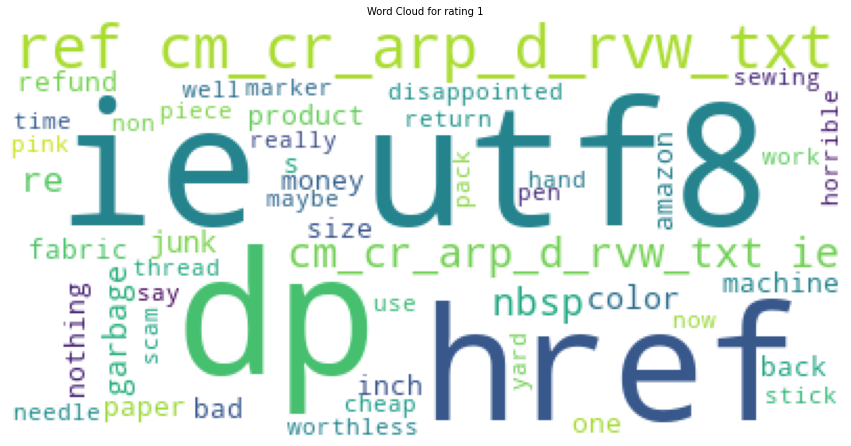

In [ ]:
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,10))
plt.imshow(wc.generate(unique_class_one))
plt.title("Word Cloud for rating 1", fontsize = 10)
plt.axis('off')
plt.show()

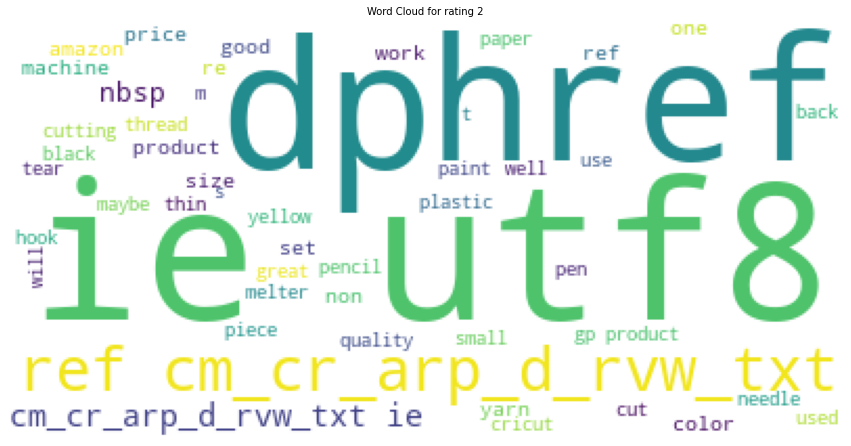

In [ ]:
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,10))
plt.imshow(wc.generate(unique_class_two))
plt.title("Word Cloud for rating 2", fontsize = 10)
plt.axis('off')
plt.show()

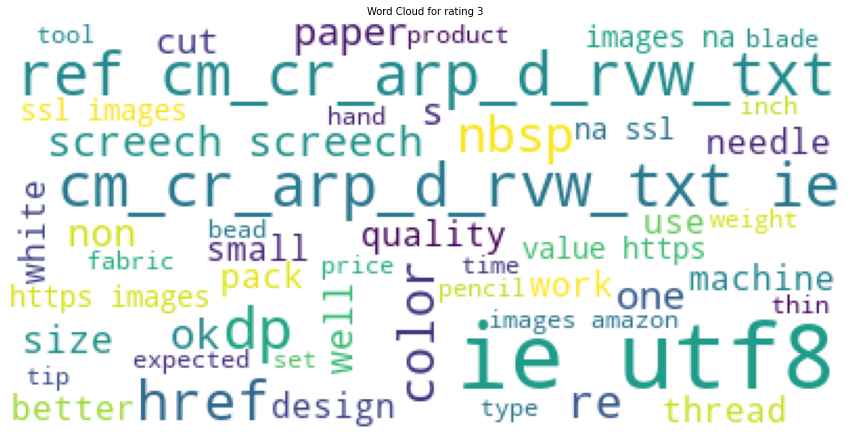

In [ ]:
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,10))
plt.imshow(wc.generate(unique_class_three))
plt.title("Word Cloud for rating 3", fontsize = 10)
plt.axis('off')
plt.show()

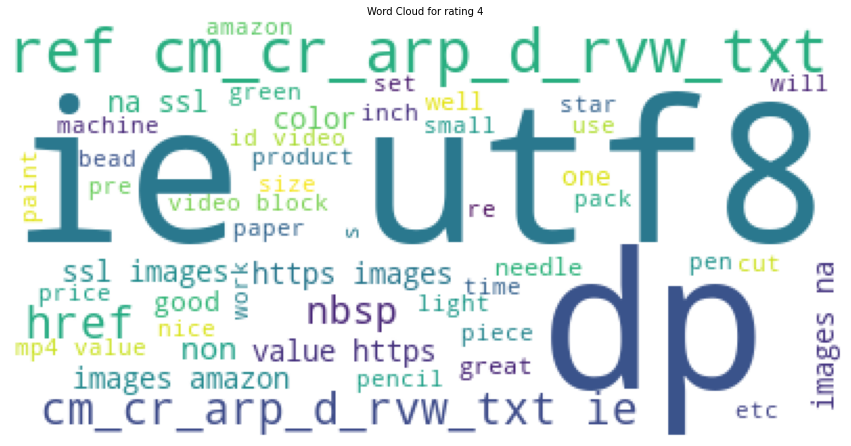

In [ ]:
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,10))
plt.imshow(wc.generate(unique_class_four))
plt.title("Word Cloud for rating 4", fontsize = 10)
plt.axis('off')
plt.show()

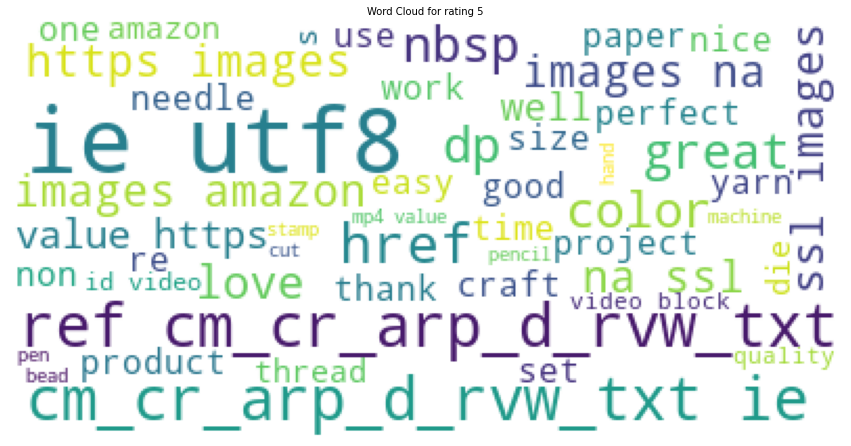

In [ ]:
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,10))
plt.imshow(wc.generate(unique_class_five))
plt.title("Word Cloud for rating 5", fontsize = 10)
plt.axis('off')
plt.show()

##### As seen in the above word cloud by different classes, we can see few of the most reccuring reviews are irrelevant words like "nbsp", "utf" , "ie" , "https" and different words with underscores in them. So we will need to remove comments with these characters as they could potentially skew the data making it difficult to run on an ML model.

# Preprocessing and Modelling

In [ ]:
# Count the number of words in each review
results_df['word_count'] = results_df['Review'].str.split().apply(len)

In [ ]:
results_df.head()

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0   1      0.000      0.616      0.384          0.9432     0.002276   
1   2      0.000      0.840      0.160          0.2732     0.005162   
2   3      0.042      0.895      0.063          0.3400     0.002836   
3   4      0.000      1.000      0.000          0.0000     0.026309   
4   5      0.000      1.000      0.000          0.0000     0.109451   

   roberta_neu  roberta_pos  overall  \
0     0.011605     0.986119        5   
1     0.089017     0.905822        5   
2     0.030591     0.966573        5   
3     0.375422     0.598269        5   
4     0.802479     0.088070        5   

                                              Review  length  \
0  I love these glitter pens. They sparkle deligh...     181   
1  It works well with my machine.  I use mostly c...      57   
2  This is a great assortment of colors, though t...     318   
3                       Just what I was looking for.      28   
4      I make 400 birds for the hospital each month.      45   

                                           temp_list  word_count  
0  [I, love, these, glitter, pens., They, sparkle...          28  
1  [It, works, well, with, my, machine., I, use, ...          12  
2  [This, is, a, great, assortment, of, colors,, ...          60  
3                [Just, what, I, was, looking, for.]           6  
4  [I, make, 400, birds, for, the, hospital, each...           9

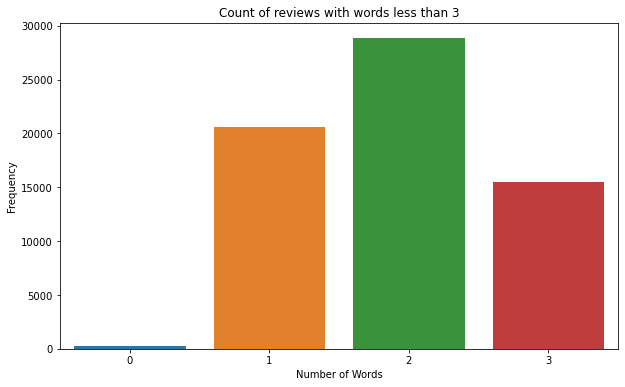

In [ ]:
# Filter the rows where the word count is exactly 3
three_word_comments = results_df[results_df['word_count'] <= 3]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=three_word_comments, x='word_count')
plt.title('Count of reviews with words less than 3')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
results_df['word_count'].describe()

count    370863.000000
mean         30.979108
std          55.646107
min           0.000000
25%           5.000000
50%          15.000000
75%          35.000000
max        3739.000000
Name: word_count, dtype: float64

In [ ]:
filtered_df = results_df[results_df['word_count'] == 2]
print(len(filtered_df))

28840


### Checking the number of reviews with words equal to 1 or 2 broken down by different classes

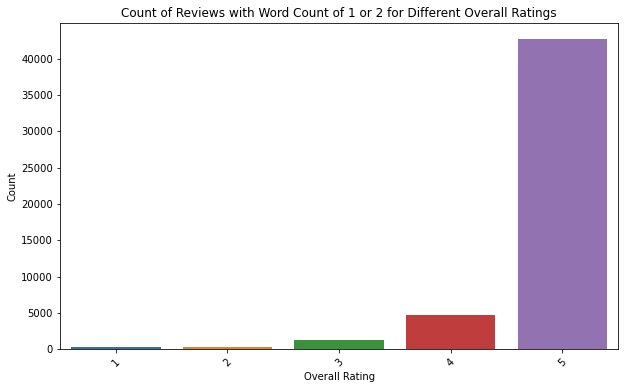

In [ ]:
# Filter the DataFrame for reviews with a word count of 1 or 2
two_word_reviews = results_df[(results_df['word_count'] == 2) | (results_df['word_count'] == 1)]

# Count the number of such reviews for each overall rating
counts = two_word_reviews['overall'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Count of Reviews with Word Count of 1 or 2 for Different Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### From the above it is clear that majority of 2 words comments are mainly from rating = 5

### Removing the comments with words less than or equal to 4 words and reviews which contain hyperlink and few of the irrelevant words we saw earlier in the wordcloud

In [ ]:
# Define the list of strings to search for
search_strings = ["nbsp", "utf8", "cm_cr_arp", "ie", "ref", "https", "txt", "ssl", "href", "dp"]

# Create a regular expression pattern to match any of the search strings
pattern = "|".join(search_strings)

# Filter the DataFrame for reviews that contain any of the search strings
filtered_reviews = results_df[results_df['Review'].str.contains(pattern, flags=re.IGNORECASE)]

# Filter again to get only the reviews that contain the exact string "ie"
filtered_reviews_ie = filtered_reviews[filtered_reviews['Review'].str.contains(r'\bie\b', flags=re.IGNORECASE)]

# Print the filtered reviews
for review in filtered_reviews_ie['Review']:
    print(review)

<a data-hook="product-link-linked" class="a-link-normal" href="/Longzang-S216-LIFE-Tree-Craft-Art-Silicone-Soap-Mold-Pink/dp/B00EI3MGUW/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Longzang S216 LIFE Tree Craft Art Silicone Soap Mold, Pink</a>&nbsp;I so love this !!! Very easy to use for either soaps or chocolate .. Detail is awesome ... It feels like a jelly itself but it holds and molds perfectly .. fantastic product and I may be buying a few more ..
My main embroidery machine is a Baby Lock Spirit.  This machine is a very small percentage of the cost and features HOWEVER still stitches beautifully, is loaded with features and has good stitch quality.

---> biggest thing about this machine is the largest size pattern this machine can stitch is 4x4

A word of warning while this machine is low coast the hobby of embroidery is not.
Cost include:
1. Stabilizer - there are different types for uses.  Most are pretty comparable however when it comes to free standing lace brand of stabilizer makes a HUG

In [ ]:
def filter_reviews(df):
    search_strings = ["nbsp", "utf8", "cm_cr_arp", "ie=", "ref", "https", "txt", "ssl", "href", "dp"]
    pattern = "|".join(search_strings)
    filtered_indices = df[df['Review'].str.contains(pattern, flags=re.IGNORECASE)].index #review contains any of the above
    filtered_indices_word_count = df[df['word_count'] < 4].index #word is less than 4
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') # removing the hyperlinks
    filtered_indices_url = df[df['Review'].str.contains(url_pattern)].index

    # Combine all filtered indices
    combined_indices = set(filtered_indices) | set(filtered_indices_word_count) | set(filtered_indices_url)

    # Drop rows based on filtered indices
    filtered_df = df.drop(combined_indices)
    filtered_df.reset_index(drop=True, inplace=True)

    return filtered_df

In [ ]:
# Filter the DataFrame using the defined function
filtered_df = filter_reviews(results_df)

In [ ]:
# Checking the df size
print("Before Cleaning:",len(results_df))
print("After Cleaning:",len(filtered_df))

Before Cleaning: 370863
After Cleaning: 295068


###  Printing the word cloud of class 1 and 5 to confirm if this changed the pattern of the words in the dataframe

In [ ]:
# Combining all reviews for 1 and 5 rating
class_one = " ".join(filtered_df[filtered_df["overall"] == 1]['Review'])
class_one = class_one.lower().split()

class_five = " ".join(filtered_df[filtered_df["overall"] == 5]['Review'])
class_five = class_five.lower().split()

# Finding words from reviews which are present in that rating
unique_class_one = [x for x in class_one if x not in class_five]
unique_class_one = " ".join(unique_class_one)

unique_class_five = [x for x in class_five if x not in class_one]
unique_class_five = " ".join(unique_class_five)

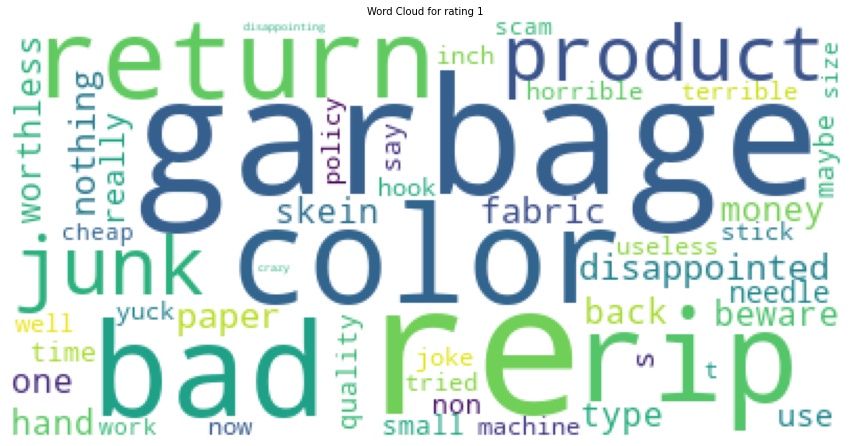

In [ ]:
#Class 1
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,10))
plt.imshow(wc.generate(unique_class_one))
plt.title("Word Cloud for rating 1", fontsize = 10)
plt.axis('off')
plt.show()

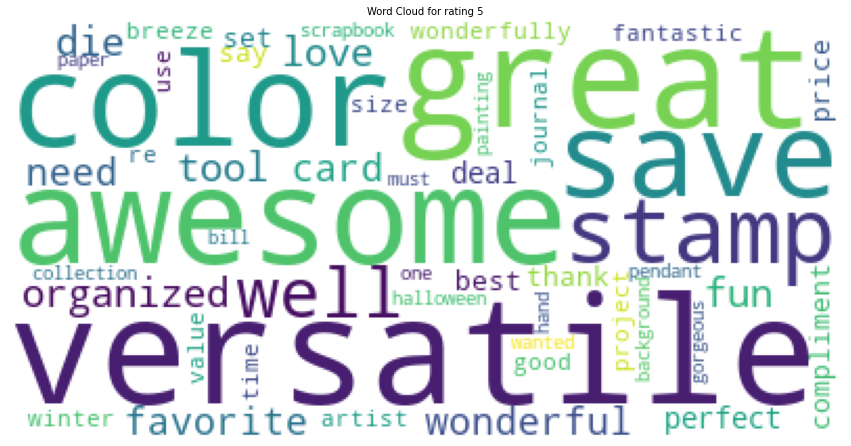

In [ ]:
#Class 5
wc = WordCloud(background_color = "white", max_words = 50)

plt.figure(figsize = (15,10))
plt.imshow(wc.generate(unique_class_five))
plt.title("Word Cloud for rating 5", fontsize = 10)
plt.axis('off')
plt.show()

### To build the corpus from the "Reviews" we perform the following -
1. Replace any non alphabet characters with a space
2. Convert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form to the corpus

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]

    return ' '.join(cleaned_words)
filtered_df['Cleaned_Review'] = filtered_df['Review'].apply(lambda x:clean_text(x))

In [ ]:
filtered_df['new_temp_list'] = filtered_df['Cleaned_Review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in filtered_df['new_temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

#### As seen above, majority of the common words are "great" , "use" , "love" after removing the punctuations and stop words

In [ ]:
filtered_df.head()

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0   1      0.000      0.616      0.384          0.9432     0.002276   
1   2      0.000      0.840      0.160          0.2732     0.005162   
2   3      0.042      0.895      0.063          0.3400     0.002836   
3   4      0.000      1.000      0.000          0.0000     0.026309   
4   5      0.000      1.000      0.000          0.0000     0.109451   

   roberta_neu  roberta_pos  overall  \
0     0.011605     0.986119        5   
1     0.089017     0.905822        5   
2     0.030591     0.966573        5   
3     0.375422     0.598269        5   
4     0.802479     0.088070        5   

                                              Review  length  \
0  I love these glitter pens. They sparkle deligh...     181   
1  It works well with my machine.  I use mostly c...      57   
2  This is a great assortment of colors, though t...     318   
3                       Just what I was looking for.      28   
4      I make 400 birds for the hospital each month.      45   

                                           temp_list  word_count  \
0  [I, love, these, glitter, pens., They, sparkle...          28   
1  [It, works, well, with, my, machine., I, use, ...          12   
2  [This, is, a, great, assortment, of, colors,, ...          60   
3                [Just, what, I, was, looking, for.]           6   
4  [I, make, 400, birds, for, the, hospital, each...           9   

                                      Cleaned_Review  \
0  love glitter pens sparkle delightfully page th...   
1                works well machine use mostly cones   
2  great assortment colors though lot pinks mix s...   
3                                            looking   
4                          make birds hospital month   

                                       new_temp_list  
0  [love, glitter, pens, sparkle, delightfully, p...  
1         [works, well, machine, use, mostly, cones]  
2  [great, assortment, colors, though, lot, pinks...  
3                                          [looking]  
4                     [make, birds, hospital, month]

#### Then the most and the least frequent words in each field were removed as they could add noise into the data. The meanings of the common (most frequent) words in the semantic analysis are very close to stopwords. Below is the graph to represent the most and least common words in Cleaned_Review

In [ ]:
word_freq = pd.Series(' '.join(filtered_df['Review']).split()).value_counts()

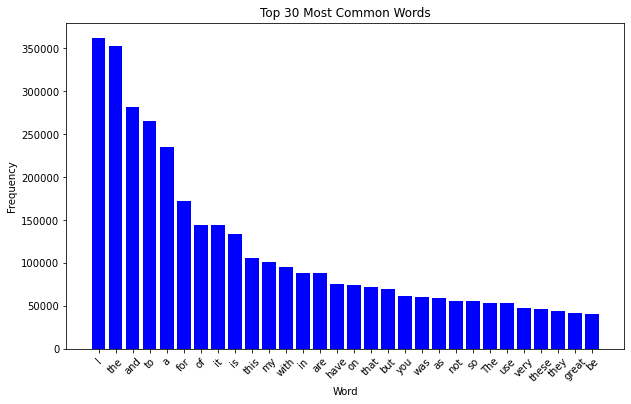

In [ ]:
# Extract the most common words and their frequencies
common_words = word_freq[:30].index.tolist()
frequencies = word_freq[:30].tolist()

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(common_words, frequencies, color='blue')
plt.title('Top 30 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

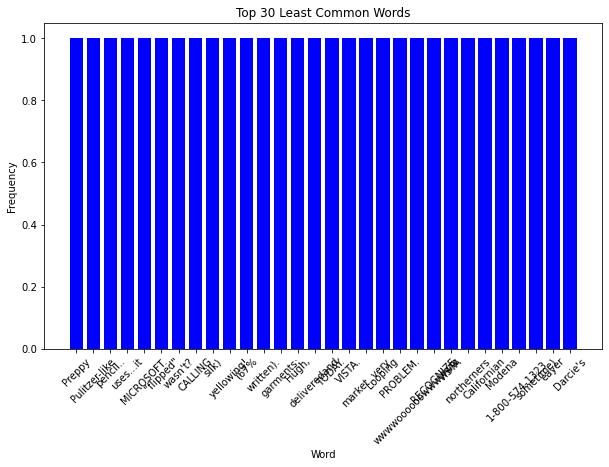

In [ ]:
least_common_words = word_freq[-30:].index.tolist()
least_frequencies = word_freq[-30:].tolist()

plt.figure(figsize=(10, 6))
plt.bar(least_common_words, least_frequencies, color='blue')
plt.title('Top 30 Least Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Remove the least frequent words
rare_words = word_freq[-1000:].index.tolist()
filtered_df['most_least_review'] = filtered_df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

# Remove the most frequent words
common_words = word_freq[:30].index.tolist()
filtered_df['most_least_review'] = filtered_df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in common_words))

In [ ]:
sb = SnowballStemmer("english")
def stemming_comments(text):
    text = ' '.join(sb.stem(word) for word in text.split(' '))
    return text

In [ ]:
filtered_df['stemmed_cleaned_reviews'] = filtered_df['most_least_review'].apply(stemming_comments)

In [ ]:
filtered_df.head()

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0   1      0.000      0.616      0.384          0.9432     0.002276   
1   2      0.000      0.840      0.160          0.2732     0.005162   
2   3      0.042      0.895      0.063          0.3400     0.002836   
3   4      0.000      1.000      0.000          0.0000     0.026309   
4   5      0.000      1.000      0.000          0.0000     0.109451   

   roberta_neu  roberta_pos  overall  \
0     0.011605     0.986119        5   
1     0.089017     0.905822        5   
2     0.030591     0.966573        5   
3     0.375422     0.598269        5   
4     0.802479     0.088070        5   

                                              Review  length  \
0  I love these glitter pens. They sparkle deligh...     181   
1  It works well with my machine.  I use mostly c...      57   
2  This is a great assortment of colors, though t...     318   
3                       Just what I was looking for.      28   
4      I make 400 birds for the hospital each month.      45   

                                           temp_list  word_count  \
0  [I, love, these, glitter, pens., They, sparkle...          28   
1  [It, works, well, with, my, machine., I, use, ...          12   
2  [This, is, a, great, assortment, of, colors,, ...          60   
3                [Just, what, I, was, looking, for.]           6   
4  [I, make, 400, birds, for, the, hospital, each...           9   

                                      Cleaned_Review  \
0  love glitter pens sparkle delightfully page th...   
1                works well machine use mostly cones   
2  great assortment colors though lot pinks mix s...   
3                                            looking   
4                          make birds hospital month   

                                       new_temp_list  \
0  [love, glitter, pens, sparkle, delightfully, p...   
1         [works, well, machine, use, mostly, cones]   
2  [great, assortment, colors, though, lot, pinks...   
3                                          [looking]   
4                     [make, birds, hospital, month]   

                                   most_least_review  \
0  love glitter pens. They sparkle delightfully p...   
1            It works well machine. mostly cones it.   
2  This assortment colors, though there lot pinks...   
3                             Just what looking for.   
4                make 400 birds hospital each month.   

                             stemmed_cleaned_reviews  
0  love glitter pens. they sparkl delight page, t...  
1                it work well machine. most cone it.  
2  this assort colors, though there lot pink mix....  
3                                just what look for.  
4                   make 400 bird hospit each month.

### CountVectorizer

In [ ]:
X = filtered_df['most_least_review']
y = filtered_df['overall']
print(f"X Shape : {X.shape}")
print(f"y Shape : {y.shape}")

X Shape : (295068,)
y Shape : (295068,)


In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
print(f"X Shape : {X.shape}")

X Shape : (295068, 48541)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=42)
print(f"X Train : {X_train.shape}")
print(f"X Test : {X_test.shape}")
print(f"Y Train : {y_train.shape}")
print(f"Y Test : {y_test.shape}")

X Train : (206547, 48541)
X Test : (88521, 48541)
Y Train : (206547,)
Y Test : (88521,)


In [ ]:
# Create a MultinomialNB model
mb = MultinomialNB()
mb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions = mb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 1114    64   433   244  1003]
 [  304   139   612   405  1150]
 [  183    33  1344  1380  2604]
 [   67    30   620  2796  7628]
 [  160    70   588  2676 62874]]


              precision    recall  f1-score   support

           1       0.61      0.39      0.48      2858
           2       0.41      0.05      0.09      2610
           3       0.37      0.24      0.29      5544
           4       0.37      0.25      0.30     11141
           5       0.84      0.95      0.89     66368

    accuracy                           0.77     88521
   macro avg       0.52      0.38      0.41     88521
weighted avg       0.73      0.77      0.74     88521



### Using Bag of Word CountVectorizer and Tfidf in a Pipline - MultiNomialNB

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [ ]:
X = filtered_df['most_least_review']
y = filtered_df['overall']
print(f"X Shape : {X.shape}")
print(f"y Shape : {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=42)
print(f"X Train : {X_train.shape}")
print(f"X Test : {X_test.shape}")
print(f"Y Train : {y_train.shape}")
print(f"Y Test : {y_test.shape}")

X Shape : (295068,)
y Shape : (295068,)
X Train : (206547,)
X Test : (88521,)
Y Train : (206547,)
Y Test : (88521,)


In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[   18     0     2     9  2829]
 [    4     1     5     3  2597]
 [    1     0    19    29  5495]
 [    0     0     3    49 11089]
 [    3     4     3    16 66342]]


              precision    recall  f1-score   support

           1       0.69      0.01      0.01      2858
           2       0.20      0.00      0.00      2610
           3       0.59      0.00      0.01      5544
           4       0.46      0.00      0.01     11141
           5       0.75      1.00      0.86     66368

    accuracy                           0.75     88521
   macro avg       0.54      0.20      0.18     88521
weighted avg       0.69      0.75      0.64     88521



In [ ]:
scaler = MinMaxScaler()
x_train_scl = scaler.fit_transform(X_train)
x_test_scl = scaler.fit_transform(X_test)

In [ ]:
# Create a MultinomialNB model
model_mb = MultinomialNB()

model_mb.fit(x_train_scl, y_train)
print("train accuracy:", model_mb.score(x_train_scl,y_train))
print("test accuracy:", model_mb.score(x_test_scl,y_test))

train accuracy: 0.7564794496174604
test accuracy: 0.7549733961432881


In [ ]:
# Create a Logistic Regression model
model_lr = LogisticRegression()
# Train the model
model_lr.fit(x_train_scl, y_train)
print("train accuracy:", model_lr.score(x_train_scl,y_train))
print("test accuracy:", model_lr.score(x_test_scl,y_test))

train accuracy: 0.7818126360917417
test accuracy: 0.7754939505879961


#### After Scaling the data between 0 and 1 it can be seen that we are getting an accuracy of 78% with LogisticRegression and 75% with MultinomialNB

## More Experiments with train and test set:

##### Experimenting without upsampling and Preprocessing

In [ ]:
#Logistic Regression
train = train.dropna(subset=['Review'])
X_train, X_test, y_train, y_test = train_test_split(train['Review'], train['overall'], test_size=0.30, random_state=10)

#Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Model training
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

#Evaluation on test data
y_pred = model_lr.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.79809273856497


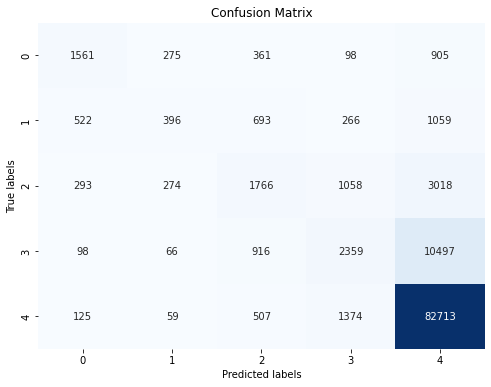

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.49      0.54      3200
           2       0.37      0.13      0.20      2936
           3       0.42      0.28      0.33      6409
           4       0.46      0.17      0.25     13936
           5       0.84      0.98      0.90     84778

    accuracy                           0.80    111259
   macro avg       0.54      0.41      0.44    111259
weighted avg       0.75      0.80      0.76    111259



In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#Random Forest Classifier
train = train.dropna(subset=['Review'])
X_train, X_test, y_train, y_test = train_test_split(train['Review'], train['overall'], test_size=0.30, random_state=10)

#Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Model training
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, y_train)

#Evaluation on test data
y_pred = model_rf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8040518070448234


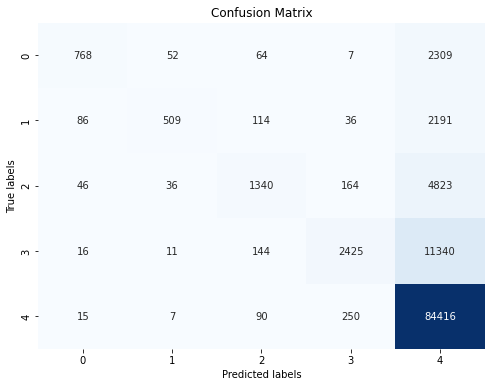

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.24      0.37      3200
           2       0.83      0.17      0.29      2936
           3       0.76      0.21      0.33      6409
           4       0.84      0.17      0.29     13936
           5       0.80      1.00      0.89     84778

    accuracy                           0.80    111259
   macro avg       0.81      0.36      0.43    111259
weighted avg       0.81      0.80      0.75    111259



In [ ]:
#Confusion Matrix Visualziations
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

#### Training and evaluating the model using TF-IDF vectors with n gram features

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train, X_test, y_train, y_test = train_test_split(train['Review'], train['overall'], test_size=0.30, random_state=42)

In [ ]:
def train_and_evaluate_ngram_model(X_train, X_test, y_train, y_test, ngram_range=(1, 1)):
    #Vectorize text data using TFIDF with n-gram features
    tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=ngram_range)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    #Training logistic regression model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    train_accuracy = model.score(X_train_tfidf, y_train)
    test_accuracy = model.score(X_test_tfidf, y_test)
    y_pred = model.predict(X_test_tfidf)
    report = classification_report(y_test, y_pred)

    return train_accuracy, test_accuracy, report

#Evaluating the model using unigram features
unigram_train_accuracy, unigram_test_accuracy, unigram_report = train_and_evaluate_ngram_model(X_train, X_test, y_train, y_test, ngram_range=(1, 1))

#Evaluating the model using bigram features
bigram_train_accuracy, bigram_test_accuracy, bigram_report = train_and_evaluate_ngram_model(X_train, X_test, y_train, y_test, ngram_range=(2, 2))

#Evaluating the model using trigram features
trigram_train_accuracy, trigram_test_accuracy, trigram_report = train_and_evaluate_ngram_model(X_train, X_test, y_train, y_test, ngram_range=(3, 3))

In [ ]:
#Printing results for unigram features
print("Accuracy using Unigram features - Train:", unigram_train_accuracy)
print("Accuracy using Unigram features - Test:", unigram_test_accuracy)
print("Classification Report - Unigram features:")
print(unigram_report)

Accuracy using Unigram features - Train: 0.8098604027672918
Accuracy using Unigram features - Test: 0.7982365471557357
Classification Report - Unigram features:
              precision    recall  f1-score   support

           1       0.59      0.50      0.54      3253
           2       0.33      0.13      0.18      2925
           3       0.40      0.29      0.34      6400
           4       0.46      0.16      0.24     13685
           5       0.85      0.97      0.90     84996

    accuracy                           0.80    111259
   macro avg       0.53      0.41      0.44    111259
weighted avg       0.75      0.80      0.76    111259



In [ ]:
#Printing results for bigram features
print("\nAccuracy using Bigram features - Train:", bigram_train_accuracy)
print("Accuracy using Bigram features - Test:", bigram_test_accuracy)
print("Classification Report - Bigram features:")
print(bigram_report)


Accuracy using Bigram features - Train: 0.8155459854239534
Accuracy using Bigram features - Test: 0.7995128483987812
Classification Report - Bigram features:
              precision    recall  f1-score   support

           1       0.59      0.39      0.47      3253
           2       0.40      0.12      0.18      2925
           3       0.45      0.28      0.34      6400
           4       0.47      0.16      0.24     13685
           5       0.84      0.98      0.90     84996

    accuracy                           0.80    111259
   macro avg       0.55      0.38      0.43    111259
weighted avg       0.75      0.80      0.76    111259



In [ ]:
#Printing results for trigram features
print("\nAccuracy using Trigram features - Train:", trigram_train_accuracy)
print("Accuracy using Trigram features - Test:", trigram_test_accuracy)
print("Classification Report - Trigram features:")
print(trigram_report)


Accuracy using Trigram features - Train: 0.7997912204742608
Accuracy using Trigram features - Test: 0.7854735347252807
Classification Report - Trigram features:
              precision    recall  f1-score   support

           1       0.58      0.25      0.35      3253
           2       0.40      0.08      0.13      2925
           3       0.40      0.17      0.24      6400
           4       0.44      0.13      0.20     13685
           5       0.81      0.98      0.89     84996

    accuracy                           0.79    111259
   macro avg       0.53      0.32      0.36    111259
weighted avg       0.73      0.79      0.73    111259



##### Unigram and Bigram gave better accuracy than trigram

## Hyper Parameter Tuning with Multinomial NB , Decision Tree & KNN

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train = pd.read_csv('train.csv')
X = train['Review']
y = train['overall']

In [ ]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Textprocessing and representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

#Hyperparameters to tune for each model
params = {
    'Multinomial Naive Bayes': {'alpha': [0.1, 0.5, 1.0]},
    'Decision Trees': {'max_depth': [None, 10, 20, 30],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 5, 10],
                       'min_impurity_decrease': [0.0, 0.01, 0.1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]}
}

#Best model and parameters initialization
best_model = None
best_params = {}
best_accuracy = 0.0

#Model selection and hyperparameter tuning
for model_name, model in models.items():
    print(f"Experimenting with {model_name}...")
    grid_search = GridSearchCV(model, params[model_name], cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)
    y_pred = grid_search.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {model_name}: {accuracy:.2f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name
        best_params = grid_search.best_params_

#Printing the best model and its parameters
print("\nBest Model:")
print(f"Model: {best_model}")
print("Best Parameters:", best_params)
print(f"Best Accuracy: {best_accuracy:.2f}")

Experimenting with Multinomial Naive Bayes...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for Multinomial Naive Bayes: {'alpha': 0.1}
Best Accuracy for Multinomial Naive Bayes: 0.77
Experimenting with Decision Trees...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Decision Trees: {'max_depth': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy for Decision Trees: 0.77
Experimenting with K-Nearest Neighbors...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 5}
Best Accuracy for K-Nearest Neighbors: 0.77

Best Model:
Model: Decision Trees
Best Parameters: {'max_depth': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.77


#### In the above code with the help of hyper parameter tuning, 3 ML models were run:
    1. Multinomial Naive Bayes
    2. Decision Tree
    3. KNN
#### Upon reviewing the results with different paramters for all the 3 models, the following accuracy can be seen:
    1. Multinomial Naive Bayes gives an accuracy of 77%
    2. Decision Tree gives an accuracy of 77%
    3. KNN ( Unsupervised Learning model ) gives an accuracy of 77%


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Experimenting with just upsampling the classes with lower data using SMOTE - Random Forest Classifier

In [ ]:
#Upsample ratings 1 to 4 to balance the dataset
df_upsampled = pd.concat([train[train['overall'] == rating].sample(n=len(train[train['overall'] == 5]), replace=True, random_state=42) for rating in range(1, 5)])
train = pd.concat([train[train['overall'] == 5], df_upsampled])

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train['Review'], train['overall'], test_size=0.25, random_state=42)

#Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Apply SMOTE for oversampling to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
#Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_pred_train = rf_classifier.predict(X_train_tfidf)
rf_pred_test = rf_classifier.predict(X_test_tfidf)

#Evaluate Random Forest Classifier
rf_train_accuracy = accuracy_score(y_train, rf_pred_train)
rf_test_accuracy = accuracy_score(y_test, rf_pred_test)
print("Random Forest Classifier:")
print("Training Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)
print("Classification Report (Test Data):\n", classification_report(y_test, rf_pred_test))

Random Forest Classifier:
Training Accuracy: 0.9666775908116639
Test Accuracy: 0.9614868472724087
Classification Report (Test Data):
               precision    recall  f1-score   support

           1       0.99      0.99      0.99     70617
           2       0.99      0.98      0.99     71192
           3       0.97      0.97      0.97     70885
           4       0.93      0.93      0.93     70899
           5       0.93      0.94      0.94     70364

    accuracy                           0.96    353957
   macro avg       0.96      0.96      0.96    353957
weighted avg       0.96      0.96      0.96    353957



In [ ]:
#Sample Submission sample_submission.csv for Random Forest

#Vectorize test data
test_reviews = test['Review'].astype(str)
X_test_tfidf = tfidf_vectorizer.transform(test_reviews)

#Making predictions on the test data using the trained Random Forest Classifier
predictions = rf_classifier.predict(X_test_tfidf)

#Creating a DataFrame with review IDs and predicted ratings
submission_df = pd.DataFrame({'id': test['id'], 'overall': predictions})
submission_df.to_csv('sample_submission_rf.csv', index=False)

##### Experimenting with just upsampling the classes with lower data using SMOTE - Logistic Regression

In [14]:
#Cleaning and preprocessing
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['Review'] = train['Review'].astype(str)
train['word_count'] = train['Review'].str.split().apply(len)

In [15]:
train.head()

overall                                             Review  word_count
0        5  I love these glitter pens. They sparkle deligh...          28
1        5  It works well with my machine.  I use mostly c...          12
2        5  This is a great assortment of colors, though t...          60
3        5                       Just what I was looking for.           6
4        5      I make 400 birds for the hospital each month.           9

In [17]:
import string

In [25]:
import string  # Add this line to import the string module

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['Review'] = train['Review'].astype(str)
train['word_count'] = train['Review'].str.split().apply(len)

def filter_reviews(train):
    filtered_indices_word_count = train[train['word_count'] < 2].index
    filtered_df = train.drop(filtered_indices_word_count)
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

filtered_df = filter_reviews(train)

print("Before Cleaning:", len(train))
print("After Cleaning:", len(filtered_df))

def clean_text(text):
    text = str(text).lower()
    # Remove specific search strings
    search_strings = ["nbsp", "utf8", "cm_cr_arp", "ie=", "ref", "https", "txt", "ssl", "href", "dp"]
    for string in search_strings:
        text = text.replace(string, '')
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

filtered_df['Cleaned_Review'] = filtered_df['Review'].apply(lambda x: clean_text(x))
df = filtered_df.copy()

Before Cleaning: 370863
After Cleaning: 350058


In [27]:
#stemming
sb = SnowballStemmer("english")
def stemming_comments(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text = ' '.join(sb.stem(word) for word in text.split(' '))
    return text

In [29]:
df['stemmed_Cleaned_Review'] = df['Cleaned_Review'].apply(stemming_comments)

In [30]:
df.head()

overall                                             Review  word_count  \
0        5  I love these glitter pens. They sparkle deligh...          28   
1        5  It works well with my machine.  I use mostly c...          12   
2        5  This is a great assortment of colors, though t...          60   
3        5                       Just what I was looking for.           6   
4        5      I make 400 birds for the hospital each month.           9   

                                      Cleaned_Review  \
0  love glitter pens. sparkle delightfully page, ...   
1           works well machine. use mostly cones it.   
2  great assortment colors, though lot pinks mix....   
3                                       looking for.   
4                         make birds hospital month.   

                              stemmed_Cleaned_Review  
0  love glitter pen sparkl delight page theyr bri...  
1                  work well machin use most cone it  
2  great assort color though lot pink mix still c...  
3                                           look for  
4                             make bird hospit month

In [43]:
df_train = df.copy()

In [46]:
df_train.overall.value_counts()

overall
5    265442
4     43668
3     20768
1     10644
2      9536
Name: count, dtype: int64

In [47]:
df_train.head()

overall                                             Review  word_count  \
0        5  I love these glitter pens. They sparkle deligh...          28   
1        5  It works well with my machine.  I use mostly c...          12   
2        5  This is a great assortment of colors, though t...          60   
3        5                       Just what I was looking for.           6   
4        5      I make 400 birds for the hospital each month.           9   

                                      Cleaned_Review  \
0  love glitter pens. sparkle delightfully page, ...   
1           works well machine. use mostly cones it.   
2  great assortment colors, though lot pinks mix....   
3                                       looking for.   
4                         make birds hospital month.   

                              stemmed_Cleaned_Review  
0  love glitter pen sparkl delight page theyr bri...  
1                  work well machin use most cone it  
2  great assort color though lot pink mix still c...  
3                                           look for  
4                             make bird hospit month

In [48]:
train = df_train.dropna(subset=['stemmed_Cleaned_Review'])
train['stemmed_Cleaned_Review'] = train['stemmed_Cleaned_Review'].astype(str)
df_upsampled = pd.concat([train[train['overall'] == rating].sample(n=len(train[train['overall'] == 5]), replace=True, random_state=42) for rating in range(1, 5)])
train = pd.concat([train[train['overall'] == 5], df_upsampled])

In [49]:
train.overall.value_counts()

overall
5    265442
1    265442
2    265442
3    265442
4    265442
Name: count, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train['stemmed_Cleaned_Review'], train['overall'], test_size=0.20, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train_resampled, y_train_resampled)
lr_pred_train = lr_classifier.predict(X_train_tfidf)
lr_pred_test = lr_classifier.predict(X_test_tfidf)

lr_train_accuracy = accuracy_score(y_train, lr_pred_train)
lr_test_accuracy = accuracy_score(y_test, lr_pred_test)
print("Logistic Regression Classifier:")
print("Training Accuracy:", lr_train_accuracy)
print("Test Accuracy:", lr_test_accuracy)
print("Classification Report (Test Data):\n", classification_report(y_test, lr_pred_test))

Logistic Regression Classifier:
Training Accuracy: 0.6335310538648744
Test Accuracy: 0.6245884223295485
Classification Report (Test Data):
               precision    recall  f1-score   support

           1       0.72      0.77      0.74     53104
           2       0.63      0.64      0.64     53357
           3       0.56      0.54      0.55     52838
           4       0.53      0.48      0.51     53338
           5       0.65      0.70      0.68     52805

    accuracy                           0.62    265442
   macro avg       0.62      0.62      0.62    265442
weighted avg       0.62      0.62      0.62    265442



### Word2Vec Embeddings - Logistic Regression

In [ ]:
#Function to get Word2Vec embeddings for a review
def get_word2vec_embeddings(review, model):
    tokens = review.split()
    embeddings = []
    for token in tokens:
        #Checking if the token exists in the Word2Vec model's vocabulary
        if token in model.wv:
            #If yes then append the corresponding embedding to the list
            embeddings.append(model.wv[token])
    #If no embeddings were found then return a vector of zeros
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)
    return np.mean(embeddings, axis=0)

In [ ]:
word2vec_model = Word2Vec(sentences=[review.split() for review in train['Review']], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train([review.split() for review in train['Review']], total_examples=len(train['Review']), epochs=10)

X_train_word2vec = np.array([get_word2vec_embeddings(review, word2vec_model) for review in train['Review']])
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train.overall)

model_word2vec = LogisticRegression()
model_word2vec.fit(X_train_word2vec, y_train_encoded)
word2vec_train_score = model_word2vec.score(X_train_word2vec, y_train_encoded)

print("Accuracy using Word2Vec - Train:", word2vec_train_score)

Accuracy using Word2Vec - Train: 0.7712524571068022


## GloVe Embeddings - Random Forest Classifier

In [ ]:
#Downloading GloVe embeddings file
url = 'http://nlp.stanford.edu/data/glove.6B.zip'
file_name = 'glove.6B.zip'
urllib.request.urlretrieve(url, file_name)

#Unzipping the downloaded file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
#Path to the GloVe embeddings file
glove_file_path = 'glove.6B.100d.txt'

#Convert GloVe format to Word2Vec format
tmp_file_path = get_tmpfile("word2vec.glove.6B.100d.txt")
glove2word2vec(glove_file_path, tmp_file_path)

#Loading Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format(tmp_file_path)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train['Review'], train['overall'], test_size=0.2, random_state=42)

# Encoding target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train_glove = np.array([get_glove_embeddings(str(review), word2vec_model) for review in X_train])

X_test_glove = np.array([get_glove_embeddings(str(review), word2vec_model) for review in X_test])

# Logistic Regression using GloVe Embeddings
model_glove = RandomForestClassifier()
model_glove.fit(X_train_glove, y_train_encoded)

glove_train_score = model_glove.score(X_train_glove, y_train_encoded)
print("Accuracy using GloVe Embeddings - Train:", glove_train_score)
glove_test_score = model_glove.score(X_test_glove, y_test_encoded)
print("Accuracy using GloVe Embeddings - Test:", glove_test_score)

Accuracy using GloVe Embeddings - Train: 0.9722167919377127
Accuracy using GloVe Embeddings - Test: 0.7988890836288137


#### As seen above GloVe Embeddings give over fitting results with more accuracy on train set and less accuracy on test set

## Deep Learning Models

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [101]:
train.head()

overall                                             Review
0        5  I love these glitter pens. They sparkle deligh...
1        5  It works well with my machine.  I use mostly c...
2        5  This is a great assortment of colors, though t...
3        5                       Just what I was looking for.
4        5      I make 400 birds for the hospital each month.

In [102]:
train['Review'] = train['Review'].astype(str)
train['word_count'] = train['Review'].str.split().apply(len)

In [103]:
def filter_reviews(train):
    search_strings = ["nbsp", "utf8", "cm_cr_arp", "ie=", "ref", "https", "txt", "ssl", "href", "dp"]
    pattern = "|".join(search_strings)
    filtered_indices = train[train['Review'].str.contains(pattern, flags=re.IGNORECASE)].index #review contains any of the above
    filtered_indices_word_count = train[train['word_count'] < 3].index
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') # removing the hyperlinks
    filtered_indices_url = train[train['Review'].str.contains(url_pattern)].index

    # Combine all filtered indices
    combined_indices = set(filtered_indices) | set(filtered_indices_word_count) | set(filtered_indices_url)

    # Drop rows based on filtered indices
    filtered_df = train.drop(combined_indices)
    filtered_df.reset_index(drop=True, inplace=True)

    return filtered_df

In [104]:
# Filter the DataFrame using the defined function
filtered_df = filter_reviews(train)
# Checking the df size
print("Before Cleaning:",len(train))
print("After Cleaning:",len(filtered_df))

Before Cleaning: 370863
After Cleaning: 310519


In [105]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]

    return ' '.join(cleaned_words)
filtered_df['Cleaned_Review'] = filtered_df['Review'].apply(lambda x:clean_text(x))

In [108]:
filtered_df.head()

overall                                             Review  word_count  \
0        5  I love these glitter pens. They sparkle deligh...          28   
1        5  It works well with my machine.  I use mostly c...          12   
2        5  This is a great assortment of colors, though t...          60   
3        5                       Just what I was looking for.           6   
4        5      I make 400 birds for the hospital each month.           9   

                                      Cleaned_Review  
0  love glitter pens sparkle delightfully page th...  
1                works well machine use mostly cones  
2  great assortment colors though lot pinks mix s...  
3                                            looking  
4                          make birds hospital month

In [109]:
df = filtered_df.copy()

In [110]:
n_most_common_words = 95000
max_len = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Cleaned_Review'].values)
sequences = tokenizer.texts_to_sequences(df['Cleaned_Review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 89798 unique tokens.


In [111]:
X = tokenizer.texts_to_sequences(df['Cleaned_Review'].values)
X = pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (310519, 250)


In [112]:
Y = pd.get_dummies(df['overall']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (310519, 5)


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(279467, 250) (279467, 5)
(31052, 250) (31052, 5)


In [114]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [322]:
model = Sequential()
model.add(Embedding(n_most_common_words, EMBEDDING_DIM, input_shape=(250,)))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
batch_size = 128
model.summary()

Epoch 1/15


3930/3930 ━━━━━━━━━━━━━━━━━━━━ 789s 200ms/step - accuracy: 0.7678 - loss: 0.6944 - val_accuracy: 0.7906 - val_loss: 0.5817
Epoch 2/15
3930/3930 ━━━━━━━━━━━━━━━━━━━━ 788s 200ms/step - accuracy: 0.7998 - loss: 0.5541 - val_accuracy: 0.7963 - val_loss: 0.5736
Epoch 3/15
3930/3930 ━━━━━━━━━━━━━━━━━━━━ 786s 200ms/step - accuracy: 0.8173 - loss: 0.5081 - val_accuracy: 0.7990 - val_loss: 0.5708
Epoch 4/15
3930/3930 ━━━━━━━━━━━━━━━━━━━━ 822s 209ms/step - accuracy: 0.8374 - loss: 0.4591 - val_accuracy: 0.7971 - val_loss: 0.5846
Epoch 5/15
3930/3930 ━━━━━━━━━━━━━━━━━━━━ 849s 216ms/step - accuracy: 0.8522 - loss: 0.4168 - val_accuracy: 0.7961 - val_loss: 0.6017
Epoch 6/15
3930/3930 ━━━━━━━━━━━━━━━━━━━━ 838s 213ms/step - accuracy: 0.8666 - loss: 0.3785 - val_accuracy: 0.7939 - val_loss: 0.6230


In [ ]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [323]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

971/971 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.8000 - loss: 0.6138
Test set
  Loss: 0.620
  Accuracy: 0.797


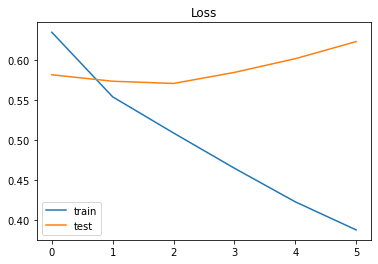

In [324]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

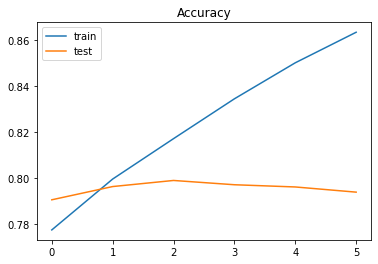

In [330]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

##### Checking with Stemming - LSTM

In [69]:
#Stemming the cleaned reviews
df['stemmed_Cleaned_Review'] = df['Cleaned_Review'].apply(stemming_comments)
df.head()

overall                                             Review  word_count  \
0        5  I love these glitter pens. They sparkle deligh...          28   
1        5  It works well with my machine.  I use mostly c...          12   
2        5  This is a great assortment of colors, though t...          60   
3        5                       Just what I was looking for.           6   
4        5      I make 400 birds for the hospital each month.           9   

                                      Cleaned_Review  \
0  love glitter pens sparkle delightfully page th...   
1                works well machine use mostly cones   
2  great assortment colors though lot pinks mix s...   
3                                            looking   
4                          make birds hospital month   

                              stemmed_Cleaned_Review  
0  love glitter pen sparkl delight page theyr bri...  
1                     work well machin use most cone  
2  great assort color though lot pink mix still c...  
3                                               look  
4                             make bird hospit month

In [71]:
n_most_common_words = 75000
max_len = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['stemmed_Cleaned_Review'].values)
sequences = tokenizer.texts_to_sequences(df['stemmed_Cleaned_Review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 72720 unique tokens.


In [73]:
X = pad_sequences(sequences, maxlen=max_len)
X = tokenizer.texts_to_sequences(df['stemmed_Cleaned_Review'].values)
X = pad_sequences(X, maxlen=max_len)
print('Shape of data:', X.shape)
Y = pd.get_dummies(df['overall']).values
print('Shape of label:', Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Shape of data: (310519, 250)
Shape of label: (310519, 5)
(279467, 250) (279467, 5)
(31052, 250) (31052, 5)


In [74]:
#LSTM model 2
#Trying with Embedding trainable = True  
model_2 = Sequential()
model_2.add(Embedding(n_most_common_words, EMBEDDING_DIM, input_shape=(250,), trainable=True))
model_2.add(SpatialDropout1D(0.2))
model_2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_2.add(Dense(5, activation='softmax',kernel_regularizer=l2(0.01)))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
batch_size = 128
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 250, 100)       │     7,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ (None, 250, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,580,905 (28.92 MB)

 Trainable params: 7,580,905 (28.92 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history_2 = model_2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.20,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/15


1856/1856 ━━━━━━━━━━━━━━━━━━━━ 498s 267ms/step - accuracy: 0.7587 - loss: 0.7676 - val_accuracy: 0.7850 - val_loss: 0.6166
Epoch 2/15
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 500s 270ms/step - accuracy: 0.7874 - loss: 0.6043 - val_accuracy: 0.7898 - val_loss: 0.6020
Epoch 3/15
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 529s 285ms/step - accuracy: 0.7958 - loss: 0.5738 - val_accuracy: 0.7917 - val_loss: 0.5950
Epoch 4/15
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 522s 281ms/step - accuracy: 0.8056 - loss: 0.5514 - val_accuracy: 0.7913 - val_loss: 0.5971
Epoch 5/15
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 498s 268ms/step - accuracy: 0.8146 - loss: 0.5289 - val_accuracy: 0.7935 - val_loss: 0.5967
Epoch 6/15
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 496s 267ms/step - accuracy: 0.8235 - loss: 0.5098 - val_accuracy: 0.7900 - val_loss: 0.6056


In [77]:
accuracy_score_model2 = model_2.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy_score_model2[0],accuracy_score_model2[1]))

  1/971 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.7188 - loss: 0.8576

971/971 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.7908 - loss: 0.5988
Test set
  Loss: 0.605
  Accuracy: 0.789


In [80]:
# Evaluate model on train data
train_loss, train_accuracy = model_2.evaluate(X_train, Y_train, verbose=0)
print("Train Accuracy:", train_accuracy)

# Evaluate model on test data
test_loss, test_accuracy = model_2.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8299012184143066
Test Accuracy: 0.7888059020042419


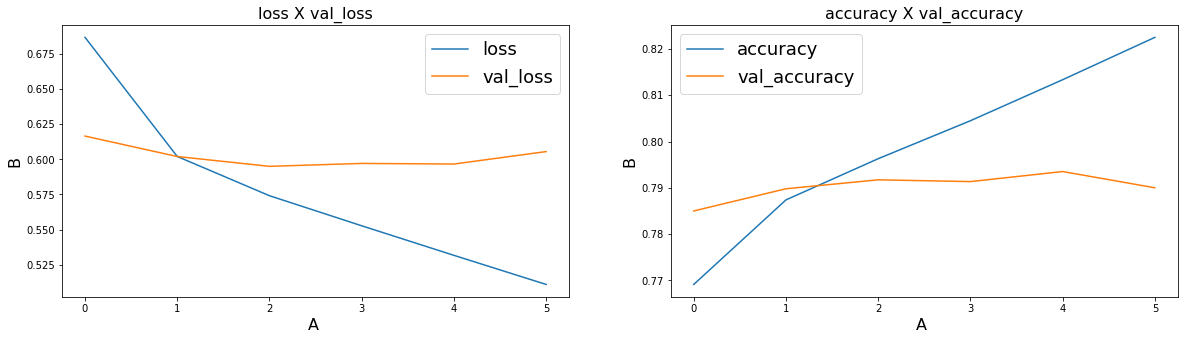

In [85]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)
plot_learning_curves(history_2, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [88]:
test = pd.read_csv('test.csv')

In [89]:
#LSTM Submisson
test_reviews = test['Review'].astype(str)
X_test_seq = tokenizer.texts_to_sequences(test_reviews)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
predictions = model_2.predict(X_test_pad)

#Now creating a df with review IDs & predicted ratings
predicted_ratings = [np.argmax(pred) + 1 for pred in predictions]  # Converting probabilities to class labels (1 to 5)
submission_df = pd.DataFrame({'id': test['id'], 'overall': predicted_ratings})

# We r saving the submission DataFrame to sample_submission.csv
submission_df.to_csv('sample_submission_lstm.csv', index=False)

3864/3864 ━━━━━━━━━━━━━━━━━━━━ 95s 25ms/step


##### Chcking with Lemmatization

In [192]:
import nltk
from nltk.stem import WordNetLemmatizer
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
train['clean_text'] = train['Review'].apply(clean_text)
train.head()
#Removing Stop words
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c', 'i' , "nbsp", "utf8", "cm_cr_arp", "ie=", "ref", "https", "txt", "ssl", "href", "dp",'cd','absolutely','absolute','love','actually']
stop_words = stop_words + more_stopwords
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
train['clean_text'] = train['clean_text'].apply(remove_stopwords)
#df.head()
#Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)
train['clean_text'] = train['clean_text'].apply(lemmatize_text)
train.head()
#Filter out reviews with one word
train = train[train['clean_text'].apply(lambda x: len(x.split())) > 2]
train.head()

overall                                             Review  \
0        5  I love these glitter pens. They sparkle deligh...   
1        5  It works well with my machine.  I use mostly c...   
2        5  This is a great assortment of colors, though t...   
4        5      I make 400 birds for the hospital each month.   
8        3  It is just okay for me.  The plastic is a bit ...   

                                          clean_text  
0  glitter pen sparkle delightfully page theyre b...  
1                  work well machine use mostly cone  
2  great assortment color though lot pink mix sti...  
4                           make bird hospital month  
8  okay plastic bit thick texture texture get cle...

In [193]:
#train.to_csv('train.csv',index=False)
def clean_repeating_chars(text):
    pattern = r'(\w)\1{2,}'
    return re.sub(pattern, r'\1', text)

train['clean_text'] = train['clean_text'].apply(clean_repeating_chars)

In [194]:
n_most_common_words = 97000
max_len = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['clean_text'].values)
sequences = tokenizer.texts_to_sequences(train['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 96467 unique tokens.


In [195]:
X = pad_sequences(sequences, maxlen=max_len)
X = tokenizer.texts_to_sequences(train['clean_text'].values)
X = pad_sequences(X, maxlen=max_len)
print('Shape of data:', X.shape)
Y = pd.get_dummies(train['overall']).values
print('Shape of label:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Shape of data: (294627, 250)
Shape of label: (294627, 5)
(235701, 250) (235701, 5)
(58926, 250) (58926, 5)


In [196]:
#LSTM model 3
#Trying with Lemmatization
model_4 = Sequential()
model_4.add(Embedding(n_most_common_words, EMBEDDING_DIM, input_shape=(250,), trainable=True))
model_4.add(SpatialDropout1D(0.2))
model_4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_4.add(Dense(5, activation='softmax',kernel_regularizer=l2(0.01)))
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
batch_size = 128
model_4.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)        │ (None, 250, 100)       │     9,700,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_14            │ (None, 250, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,780,905 (37.31 MB)

 Trainable params: 9,780,905 (37.31 MB)

 Non-trainable params: 0 (0.00 B)

In [197]:
history_4 = model_4.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.20,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/15


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 663s 448ms/step - accuracy: 0.7475 - loss: 0.8172 - val_accuracy: 0.7727 - val_loss: 0.6469
Epoch 2/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 609s 413ms/step - accuracy: 0.7793 - loss: 0.6251 - val_accuracy: 0.7774 - val_loss: 0.6328
Epoch 3/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 602s 408ms/step - accuracy: 0.7905 - loss: 0.5850 - val_accuracy: 0.7798 - val_loss: 0.6306
Epoch 4/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 596s 404ms/step - accuracy: 0.8008 - loss: 0.5575 - val_accuracy: 0.7811 - val_loss: 0.6243
Epoch 5/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 635s 430ms/step - accuracy: 0.8112 - loss: 0.5329 - val_accuracy: 0.7815 - val_loss: 0.6311
Epoch 6/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 654s 444ms/step - accuracy: 0.8258 - loss: 0.5022 - val_accuracy: 0.7824 - val_loss: 0.6449
Epoch 7/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 653s 443ms/step - accuracy: 0.8376 - loss: 0.4741 - val_accuracy: 0.7743 - val_loss: 0.6611


In [199]:
# Evaluate model on train data
train_loss, train_accuracy = model_4.evaluate(X_train, Y_train, verbose=0)
print("Train Accuracy:", train_accuracy)

# Evaluate model on test data
test_loss, test_accuracy = model_4.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8412140607833862
Test Accuracy: 0.7756847739219666


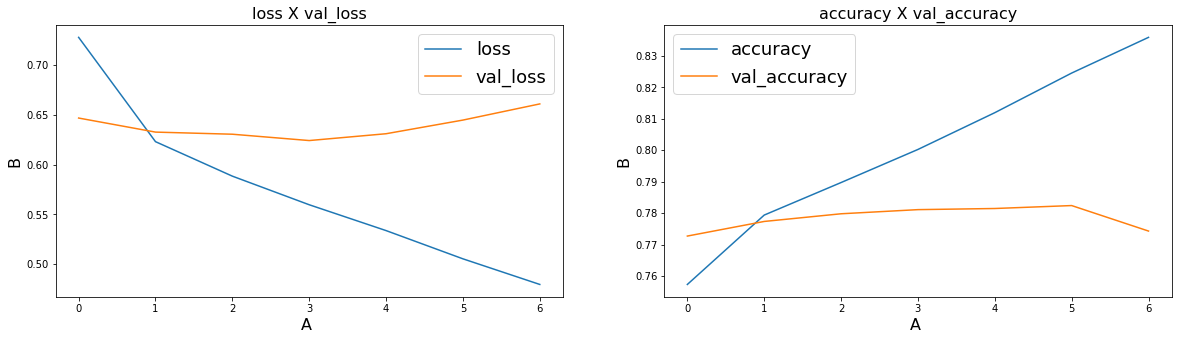

In [200]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)
plot_learning_curves(history_4, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [207]:
#LSTM Submisson - 
test = pd.read_csv('test.csv')
#test_reviews = test['Review']
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
test['Review'] = test['Review'].apply(clean_text)
test.head()
#Removing Stop words
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c', 'i' , "nbsp", "utf8", "cm_cr_arp", "ie=", "ref", "https", "txt", "ssl", "href", "dp",'cd','absolutely','absolute','love','actually']
stop_words = stop_words + more_stopwords
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
test['Review'] = test['Review'].apply(remove_stopwords)
#df.head()
#Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)
test['Review'] = test['Review'].apply(lemmatize_text)
test.head()
#Filter out reviews with one word
#test = test[test['Review'].apply(lambda x: len(x.split())) > 2]


id                                             Review
0   0                   wonderful asst wood carving tool
1   1            pretty lace way stretch exactly ordered
2   2             quick easy way start crazy quilt block
3   3                       favorite journal page smooth
4   4  bought costume making going use static electri...

In [208]:
test.head()

id                                             Review
0   0                   wonderful asst wood carving tool
1   1            pretty lace way stretch exactly ordered
2   2             quick easy way start crazy quilt block
3   3                       favorite journal page smooth
4   4  bought costume making going use static electri...

In [209]:
#LSTM Submisson
test_reviews = test['Review'].astype(str)
X_test_seq = tokenizer.texts_to_sequences(test_reviews)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
predictions = model_2.predict(X_test_pad)

#Now creating a df with review IDs & predicted ratings
predicted_ratings = [np.argmax(pred) + 1 for pred in predictions]  # Converting probabilities to class labels (1 to 5)
submission_df = pd.DataFrame({'id': test['id'], 'overall': predicted_ratings})

# We r saving the submission DataFrame to sample_submission.csv
submission_df.to_csv('sample_submission_lstm_test_Cleaned.csv', index=False)

3864/3864 ━━━━━━━━━━━━━━━━━━━━ 114s 29ms/step


# LSTM with GloVe Embeddings with Lemmatization

In [210]:
import nltk
from nltk.stem import WordNetLemmatizer
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [211]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [212]:
train['clean_text'] = train['Review'].apply(clean_text)
train.head()

overall                                             Review  \
0        5  I love these glitter pens. They sparkle deligh...   
1        5  It works well with my machine.  I use mostly c...   
2        5  This is a great assortment of colors, though t...   
3        5                       Just what I was looking for.   
4        5      I make 400 birds for the hospital each month.   

                                          clean_text  
0  i love these glitter pens they sparkle delight...  
1  it works well with my machine  i use mostly co...  
2  this is a great assortment of colors though th...  
3                        just what i was looking for  
4          i make  birds for the hospital each month

In [213]:
#Removing Stop words
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c', 'i' , "nbsp", "utf8", "cm_cr_arp", "ie=", "ref", "https", "txt", "ssl", "href", "dp"]
stop_words = stop_words + more_stopwords
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
train['clean_text'] = train['clean_text'].apply(remove_stopwords)
df.head()

overall                                             Review  word_count  \
0        5  I love these glitter pens. They sparkle deligh...          28   
1        5  It works well with my machine.  I use mostly c...          12   
2        5  This is a great assortment of colors, though t...          60   
3        5                       Just what I was looking for.           6   
4        5      I make 400 birds for the hospital each month.           9   

                                      Cleaned_Review  
0  love glitter pens sparkle delightfully page th...  
1                works well machine use mostly cones  
2  great assortment colors though lot pinks mix s...  
3                                            looking  
4                          make birds hospital month

In [214]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [215]:
train['clean_text'] = train['clean_text'].apply(lemmatize_text)
train.head()

overall                                             Review  \
0        5  I love these glitter pens. They sparkle deligh...   
1        5  It works well with my machine.  I use mostly c...   
2        5  This is a great assortment of colors, though t...   
3        5                       Just what I was looking for.   
4        5      I make 400 birds for the hospital each month.   

                                          clean_text  
0  love glitter pen sparkle delightfully page the...  
1                  work well machine use mostly cone  
2  great assortment color though lot pink mix sti...  
3                                            looking  
4                           make bird hospital month

In [216]:
#Filter out reviews with one word
train = train[train['clean_text'].apply(lambda x: len(x.split())) > 2]
train.head()

overall                                             Review  \
0        5  I love these glitter pens. They sparkle deligh...   
1        5  It works well with my machine.  I use mostly c...   
2        5  This is a great assortment of colors, though t...   
4        5      I make 400 birds for the hospital each month.   
8        3  It is just okay for me.  The plastic is a bit ...   

                                          clean_text  
0  love glitter pen sparkle delightfully page the...  
1                  work well machine use mostly cone  
2  great assortment color though lot pink mix sti...  
4                           make bird hospital month  
8  okay plastic bit thick texture texture get cle...

In [217]:
# Length of our vocabulary
texts = train['clean_text']
rating = train['overall']
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

96897

In [218]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]])

In [219]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)
longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))
train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)
train_padded_sentences

array([[   3,  389,   93, ...,    0,    0,    0],
       [   5,    9,   26, ...,    0,    0,    0],
       [   1,  557,    4, ...,    0,    0,    0],
       ...,
       [ 130,  204, 4539, ...,    0,    0,    0],
       [  35,   29,  191, ...,    0,    0,    0],
       [  14,   10,  323, ...,    0,    0,    0]])

In [220]:
import os
embeddings_dictionary = dict()
embedding_dim = 100
file_path = r'C:\Users\onetw\Downloads\Text Analytics - CW 2 - Amazon Review\glove.6B.100d.txt'
# Load GloVe 100D embeddings
with open(file_path) as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [221]:
#embeddings_dictionary

In [222]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.013786  ,  0.38216001,  0.53236002, ..., -1.04260004,
         0.28854999,  0.63055998],
       [-0.36531001,  0.31784999, -0.32047001, ..., -0.70363998,
         0.96908998,  0.021153  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [223]:
embedding_matrix[2]

array([-0.36531001,  0.31784999, -0.32047001,  0.051639  , -0.12438   ,
        0.12544   , -0.41438001,  0.13166   ,  0.075865  ,  0.43298   ,
       -0.54236001, -0.51880997, -0.027122  ,  0.44409999,  0.44092   ,
       -0.14425001,  0.88506001,  0.45245999, -0.33316001, -0.01257   ,
        0.097519  , -0.30322999,  0.25097001,  0.10618   , -0.25461   ,
       -0.029241  , -0.19771001, -0.45984   , -0.049765  ,  0.29927999,
       -0.031277  ,  1.06379998, -1.18929994,  0.018282  ,  0.47727001,
        0.46757001, -0.15711001,  0.076616  ,  0.32927999,  0.043149  ,
       -0.26666999, -0.38438001, -0.33515999, -0.25737   , -0.16917001,
       -0.021292  ,  0.073796  , -0.76374   , -0.10372   , -0.95670003,
        0.17993   ,  0.98334002, -0.098011  ,  1.28849995, -0.0035486 ,
       -2.10310006,  0.16069999, -0.4637    ,  2.1013    , -0.32036   ,
       -0.23991001,  0.51332998,  0.33583   ,  0.51770997,  1.1415    ,
       -0.25422999,  0.59353   , -0.29084   ,  0.10496   , -0.53

In [224]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_padded_sentences, rating, test_size=0.25)

In [225]:
print(length_long_sentence)

1720


In [226]:
model_3 = Sequential()
model_3.add(Embedding(vocab_length, output_dim=embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_shape=(250,) , trainable=False))
model_3.add(SpatialDropout1D(0.2))
model_3.add(Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))
model_3.add(Dense(5, activation='softmax', kernel_regularizer=l2(0.01)))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 3
batch_size = 128
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 1720, 100)      │     9,687,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 1720, 3440)     │    25,056,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 3440)           │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3440)           │        13,760 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1720)           │     5,918,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1720)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1720)           │     2,960,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1720)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         1,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,270,084 (332.91 MB)

 Trainable params: 43,631,601 (166.44 MB)

 Non-trainable params: 6,880 (26.88 KB)

 Optimizer params: 43,631,603 (166.44 MB)

In [ ]:
history_3 = model_3.fit(X_train, Y_train, epochs=epochs, verbose=1, batch_size=batch_size,validation_split=0.20,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)],shuffle = True)

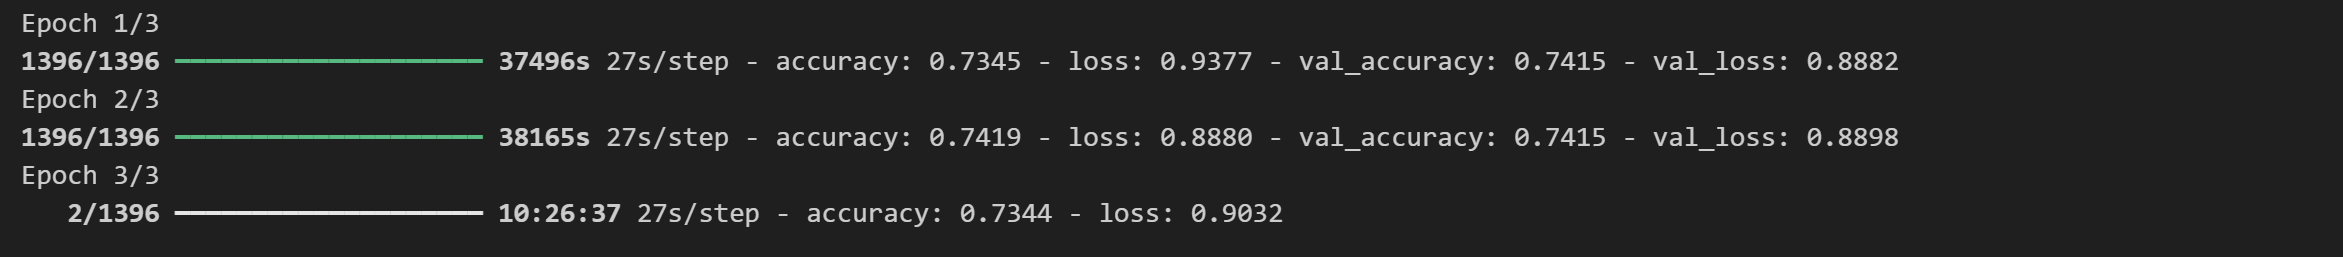

###### *The above model gave an accuracy of 74% in the second epoch. Each epoch took 10 hours and due to time constraints we had to put a pause to it.

### Conclusions and Findings:

- With further fine tuning of data and using features like Stemming/Lemmatization it can be seen that different models perform differenlty

- Our experiments show that the Random Forest Classifier, coupled with SMOTE upsampling and TF-IDF feature representation, emerges as the most effective model for sentiment analysis among those evaluated

- From our expreiment it is also understood that data preprocessing is a crucial part for models learn and understand the patters within the data which could potentially lead to better accuracy